# Homework 2 - balancing & binning (deadline 28. 11. 2020)

In short, the main task is to play with balancing and binning to obtain the best results for the binary classification task.
  
> The instructions are not given in details: It is up to you to come up with ideas on how to fulfill the particular tasks as best you can!

## What are you supposed to do:

  1. Download the dataset [here](https://www.dropbox.com/s/aq08ytozfplb97b/data.csv?dl=0).
  1. Use 2 binning methods (on features of your choice, with your choice of parameters) and comment on its effects on classification performance.
  1. Use at least 2 other data balancing techniques of your choice on the dataset and comment the classification results. **Just copied code from tutorial 4 will not be accepted.**
  1. Run all classification tests at least three times - once for unbalanced original data, twice for balanced data (try at least 2 balancing techniques), compare those results (give a comment).
  
Give comments (!) on each step of your solution, with short explanations of your choices.

**If you do all this properly, you will obtain 16 points.** 

## Comments

  * Please follow the instructions from https://courses.fit.cvut.cz/MI-PDD/homeworks/index.html.
  * If the reviewing teacher is not satisfied, she can (!) give you another chance to rework your homework and to obtain more points. However, this is not a given, so do your best! :)
  * English is not compulsory.
  
## Data description

* The dataset can be downloaded [here](https://www.dropbox.com/s/aq08ytozfplb97b/data.csv?dl=0).
* The data are devoted to the binary classification task, the aim is to predict the probability that a driver will initiate an auto insurance claim in the next year.
* Target feature is called 'y' and signifies whether or not a claim was filed for that policy holder.
* To fulfill the task one does not need to know the meaning of predictors.
* Predictors that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation.
* While using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), control the shuffling of data by random_state parameter. Do not use shuffle=False, probably never (can cause systematic error).

# Let's see the data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from imblearn.over_sampling import *
from imblearn.under_sampling import *
import math
import seaborn as sn

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('data.csv')
df.head(10)

,y,xind_01,xind_02_cat,xind_03,xind_04_cat,xind_05_cat,xind_06_bin,xind_07_bin,xind_08_bin,xind_09_bin,xind_10_bin,xind_11_bin,xind_12_bin,xind_13_bin,xind_14,xind_15,xind_16_bin,xind_17_bin,xind_18_bin,xreg_01,xreg_02,xreg_03,xcar_01_cat,xcar_02_cat,xcar_03_cat,xcar_04_cat,xcar_05_cat,xcar_06_cat,xcar_07_cat,xcar_08_cat,xcar_09_cat,xcar_10_cat,xcar_11_cat,xcar_11,xcar_12,xcar_13,xcar_14,xcar_15,xcalc_01,xcalc_02,xcalc_03,xcalc_04,xcalc_05,xcalc_06,xcalc_07,xcalc_08,xcalc_09,xcalc_10,xcalc_11,xcalc_12,xcalc_13,xcalc_14,xcalc_15_bin,xcalc_16_bin,xcalc_17_bin,xcalc_18_bin,xcalc_19_bin,xcalc_20_bin
0,0,2,1,5,1,6,0,1,0,0,0,0,0,0,0,10,1,0,0,0.6,0.0,0.602599,7,1,0,0,1,1,1,1,2,1,80,3,0.316228,0.748359,-1.000000,3.605551,0.4,0.9,0.6,2,0,6,3,4,2,4,4,0,2,8,0,0,0,1,1,0
1,0,2,1,6,0,0,0,0,0,1,0,0,0,0,0,10,1,0,0,0.4,0.0,0.511126,6,1,-1,0,1,0,1,1,0,1,95,2,0.400000,0.738675,0.401373,2.828427,0.7,0.7,0.2,4,3,9,5,10,1,11,9,2,3,7,0,0,1,0,0,0
2,0,2,1,9,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.1,0.1,-1.000000,7,1,1,0,0,14,1,1,0,1,42,2,0.400000,0.820514,0.331361,3.741657,0.2,0.3,0.0,3,1,10,3,9,2,9,5,0,2,6,0,1,0,1,1,0
3,0,1,1,6,0,0,1,0,0,0,0,0,0,0,0,10,1,0,0,0.8,0.1,0.463006,7,1,-1,0,-1,11,1,1,0,1,99,2,0.316228,0.633158,0.368782,3.000000,0.0,0.5,0.9,3,1,9,5,10,3,6,3,0,4,8,0,0,1,0,0,0
4,0,1,1,5,1,0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.4,0.0,0.685109,10,1,-1,0,-1,7,1,1,2,1,104,3,0.400000,1.016445,0.425676,3.464102,0.9,0.6,0.4,0,2,7,3,9,2,0,4,3,1,2,0,1,0,0,1,0
5,0,1,1,2,1,0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.7,0.3,0.619476,11,0,-1,0,-1,10,1,1,1,1,28,3,0.374166,0.934829,0.382099,3.316625,0.5,0.5,0.4,3,1,10,4,10,3,11,9,2,3,5,0,0,1,0,0,0
6,0,2,1,3,0,0,0,0,0,1,0,0,0,0,0,11,0,1,0,0.9,0.5,1.207528,11,0,0,9,0,17,1,1,2,1,104,3,0.547723,1.395114,0.446094,3.000000,0.0,0.8,0.8,3,0,9,4,11,0,9,8,4,1,6,1,1,0,0,0,0
7,0,2,1,3,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0.4,0.0,0.522614,11,0,1,9,0,15,1,1,2,1,104,3,0.489898,1.333221,0.361939,3.464102,0.4,0.2,0.6,3,1,6,0,9,4,12,8,1,3,7,0,1,1,0,1,0
8,0,0,2,1,0,0,1,0,0,0,0,0,1,0,1,5,1,0,0,0.9,1.1,0.602599,7,1,1,2,0,1,1,0,2,1,1,0,0.374166,0.946143,0.336155,3.605551,0.8,0.1,0.6,3,1,9,4,11,3,3,5,3,2,6,0,1,0,0,0,0
9,0,5,1,2,1,0,0,1,0,0,0,0,0,0,0,10,0,0,0,0.9,0.3,0.652399,11,1,1,1,0,12,1,1,2,1,104,2,0.387298,0.926292,0.372156,3.605551,0.9,0.7,0.1,3,1,7,2,6,4,8,6,0,3,8,0,1,1,0,1,0


In [4]:
df.shape

(595212, 58)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   y             595212 non-null  int64  
 1   xind_01       595212 non-null  int64  
 2   xind_02_cat   595212 non-null  int64  
 3   xind_03       595212 non-null  int64  
 4   xind_04_cat   595212 non-null  int64  
 5   xind_05_cat   595212 non-null  int64  
 6   xind_06_bin   595212 non-null  int64  
 7   xind_07_bin   595212 non-null  int64  
 8   xind_08_bin   595212 non-null  int64  
 9   xind_09_bin   595212 non-null  int64  
 10  xind_10_bin   595212 non-null  int64  
 11  xind_11_bin   595212 non-null  int64  
 12  xind_12_bin   595212 non-null  int64  
 13  xind_13_bin   595212 non-null  int64  
 14  xind_14       595212 non-null  int64  
 15  xind_15       595212 non-null  int64  
 16  xind_16_bin   595212 non-null  int64  
 17  xind_17_bin   595212 non-null  int64  
 18  xind

In [6]:
df.describe()

,y,xind_01,xind_02_cat,xind_03,xind_04_cat,xind_05_cat,xind_06_bin,xind_07_bin,xind_08_bin,xind_09_bin,xind_10_bin,xind_11_bin,xind_12_bin,xind_13_bin,xind_14,xind_15,xind_16_bin,xind_17_bin,xind_18_bin,xreg_01,xreg_02,xreg_03,xcar_01_cat,xcar_02_cat,xcar_03_cat,xcar_04_cat,xcar_05_cat,xcar_06_cat,xcar_07_cat,xcar_08_cat,xcar_09_cat,xcar_10_cat,xcar_11_cat,xcar_11,xcar_12,xcar_13,xcar_14,xcar_15,xcalc_01,xcalc_02,xcalc_03,xcalc_04,xcalc_05,xcalc_06,xcalc_07,xcalc_08,xcalc_09,xcalc_10,xcalc_11,xcalc_12,xcalc_13,xcalc_14,xcalc_15_bin,xcalc_16_bin,xcalc_17_bin,xcalc_18_bin,xcalc_19_bin,xcalc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000,3.000000,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.00000

### Split the data
Split to training, validation and testing data. 20 % of all data will be for testing, 20% of the rest will be for validation. Before each split, a shuffle is made.

In [7]:
RANDOM_STATE = 33

In [8]:
X = df.loc[:, df.columns != 'y']
y = df.loc[:, df.columns == 'y']

In [9]:
X_A, X_test, y_A, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_A, y_A, test_size=0.2, random_state=RANDOM_STATE, shuffle=True)

In [10]:
print(f'x_train: {X_train.shape}')
print(f'x_val: {X_val.shape}')
print(f'x_test: {X_test.shape}')

x_train: (380935, 57)
x_val: (95234, 57)
x_test: (119043, 57)


### Train the model on raw data
I've chosen logistic regression to be the prediction model. I'm getting "ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations," but increasing the number of iterations doesn't help, so I left the initial value of 100.

In [11]:
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=100)
logisticRegr.fit(X_train, y_train['y'])

/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [12]:
predictions = logisticRegr.predict(X_val)

In [13]:
score = logisticRegr.score(X_val, y_val)
print(score)

0.9633324232942017


In [14]:
cnf_matrix = confusion_matrix(y_val, predictions)

In [15]:
# code taken from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = (cm.max() + cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

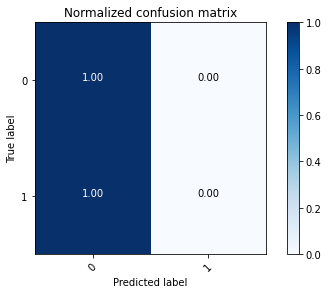

Accuracy:  0.9633324232942017 
F1-score:  0.0


In [16]:
plot_confusion_matrix(cnf_matrix, classes=[0, 1], normalize=True, title='Normalized confusion matrix')
print('Accuracy: ', accuracy_score(y_val, predictions),'\nF1-score: ', f1_score(y_val, predictions))

### Too bad.
Model just predicted '0' for all the data.
Before preprocessing the data, I'll try to use class_weight parameter in LogisticRegression model. It allow us to have more impact on the data from minority class. Good practise is to give 1 weight to the minority class and assign the ratio of minority class in all data to the majority class.

In [17]:
perc = y_train['y'].sum() / len(y_train['y'])
perc

0.03639728562615669

In [18]:
logisticRegr = LogisticRegression(solver='lbfgs', class_weight={0 : perc, 1 : 1})
logisticRegr.fit(X_train, y_train['y'])
predictions = logisticRegr.predict(X_val)
cnf_matrix = confusion_matrix(y_val, predictions)

/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


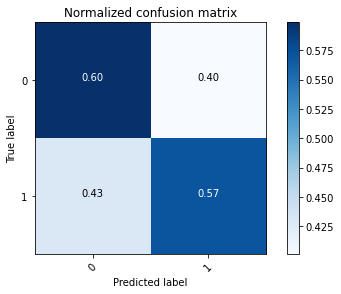

Accuracy:  0.5977172018396791 
F1-score:  0.09423836205877485


In [19]:
plot_confusion_matrix(cnf_matrix, classes=[0, 1], normalize=True, title='Normalized confusion matrix')
acc_raw = accuracy_score(y_val, predictions)
f1_raw = f1_score(y_val, predictions)
print('Accuracy: ', acc_raw,'\nF1-score: ', f1_raw)

### Much better.
The ability to predict the minority class increased, but F1-score is only about 0.09.

## Run on test data (raw)

In [20]:
def log_regression(X_tr, X_v, y_tr, y_v):
    perc = y_tr['y'].sum() / len(y_tr['y'])
    logisticRegr = LogisticRegression(solver='lbfgs', class_weight={0 : perc, 1 : 1})
    logisticRegr.fit(X_tr, y_tr['y'])
    predictions = logisticRegr.predict(X_v)
    cnf_matrix = confusion_matrix(y_v, predictions)
    plot_confusion_matrix(cnf_matrix, classes=[0, 1], normalize=True, title='Normalized confusion matrix')
    # print('Accuracy: ', accuracy_score(y_v, predictions),'\nF1-score: ', f1_score(y_v, predictions))
    return accuracy_score(y_v, predictions), f1_score(y_v, predictions)

/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


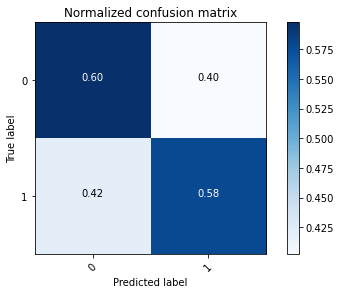

Accuracy:  0.5970027637072318 
F1-score:  0.09462519815807355


In [21]:
acc, f1 = log_regression(X_train, X_test, y_train, y_test)
print('Accuracy: ', acc,'\nF1-score: ', f1)

F1 on test data is almost the same as on validation data, which is a good news. The train/validation/test data seem to be well split.

## Clean the data?

In [22]:
for col in df.columns:
    print(f'{col}: {len(df[col].unique())}')

y: 2
xind_01: 8
xind_02_cat: 5
xind_03: 12
xind_04_cat: 3
xind_05_cat: 8
xind_06_bin: 2
xind_07_bin: 2
xind_08_bin: 2
xind_09_bin: 2
xind_10_bin: 2
xind_11_bin: 2
xind_12_bin: 2
xind_13_bin: 2
xind_14: 5
xind_15: 14
xind_16_bin: 2
xind_17_bin: 2
xind_18_bin: 2
xreg_01: 10
xreg_02: 19
xreg_03: 5013
xcar_01_cat: 13
xcar_02_cat: 3
xcar_03_cat: 3
xcar_04_cat: 10
xcar_05_cat: 3
xcar_06_cat: 18
xcar_07_cat: 3
xcar_08_cat: 2
xcar_09_cat: 6
xcar_10_cat: 3
xcar_11_cat: 104
xcar_11: 5
xcar_12: 184
xcar_13: 70482
xcar_14: 850
xcar_15: 15
xcalc_01: 10
xcalc_02: 10
xcalc_03: 10
xcalc_04: 6
xcalc_05: 7
xcalc_06: 11
xcalc_07: 10
xcalc_08: 11
xcalc_09: 8
xcalc_10: 26
xcalc_11: 20
xcalc_12: 11
xcalc_13: 14
xcalc_14: 24
xcalc_15_bin: 2
xcalc_16_bin: 2
xcalc_17_bin: 2
xcalc_18_bin: 2
xcalc_19_bin: 2
xcalc_20_bin: 2


No column contains only one value.
### What about correlation?
I'll delete one column of the pair of columns with correlation higher than a treshold to lower the data dimension. I did experimentally change the treshold. Lower the threshold, accuracy and f1 score goes down. Value of 0.6 cuts down 3 columns and has a little impact on the accuracy and f1.

In [23]:
corr = df.corr()

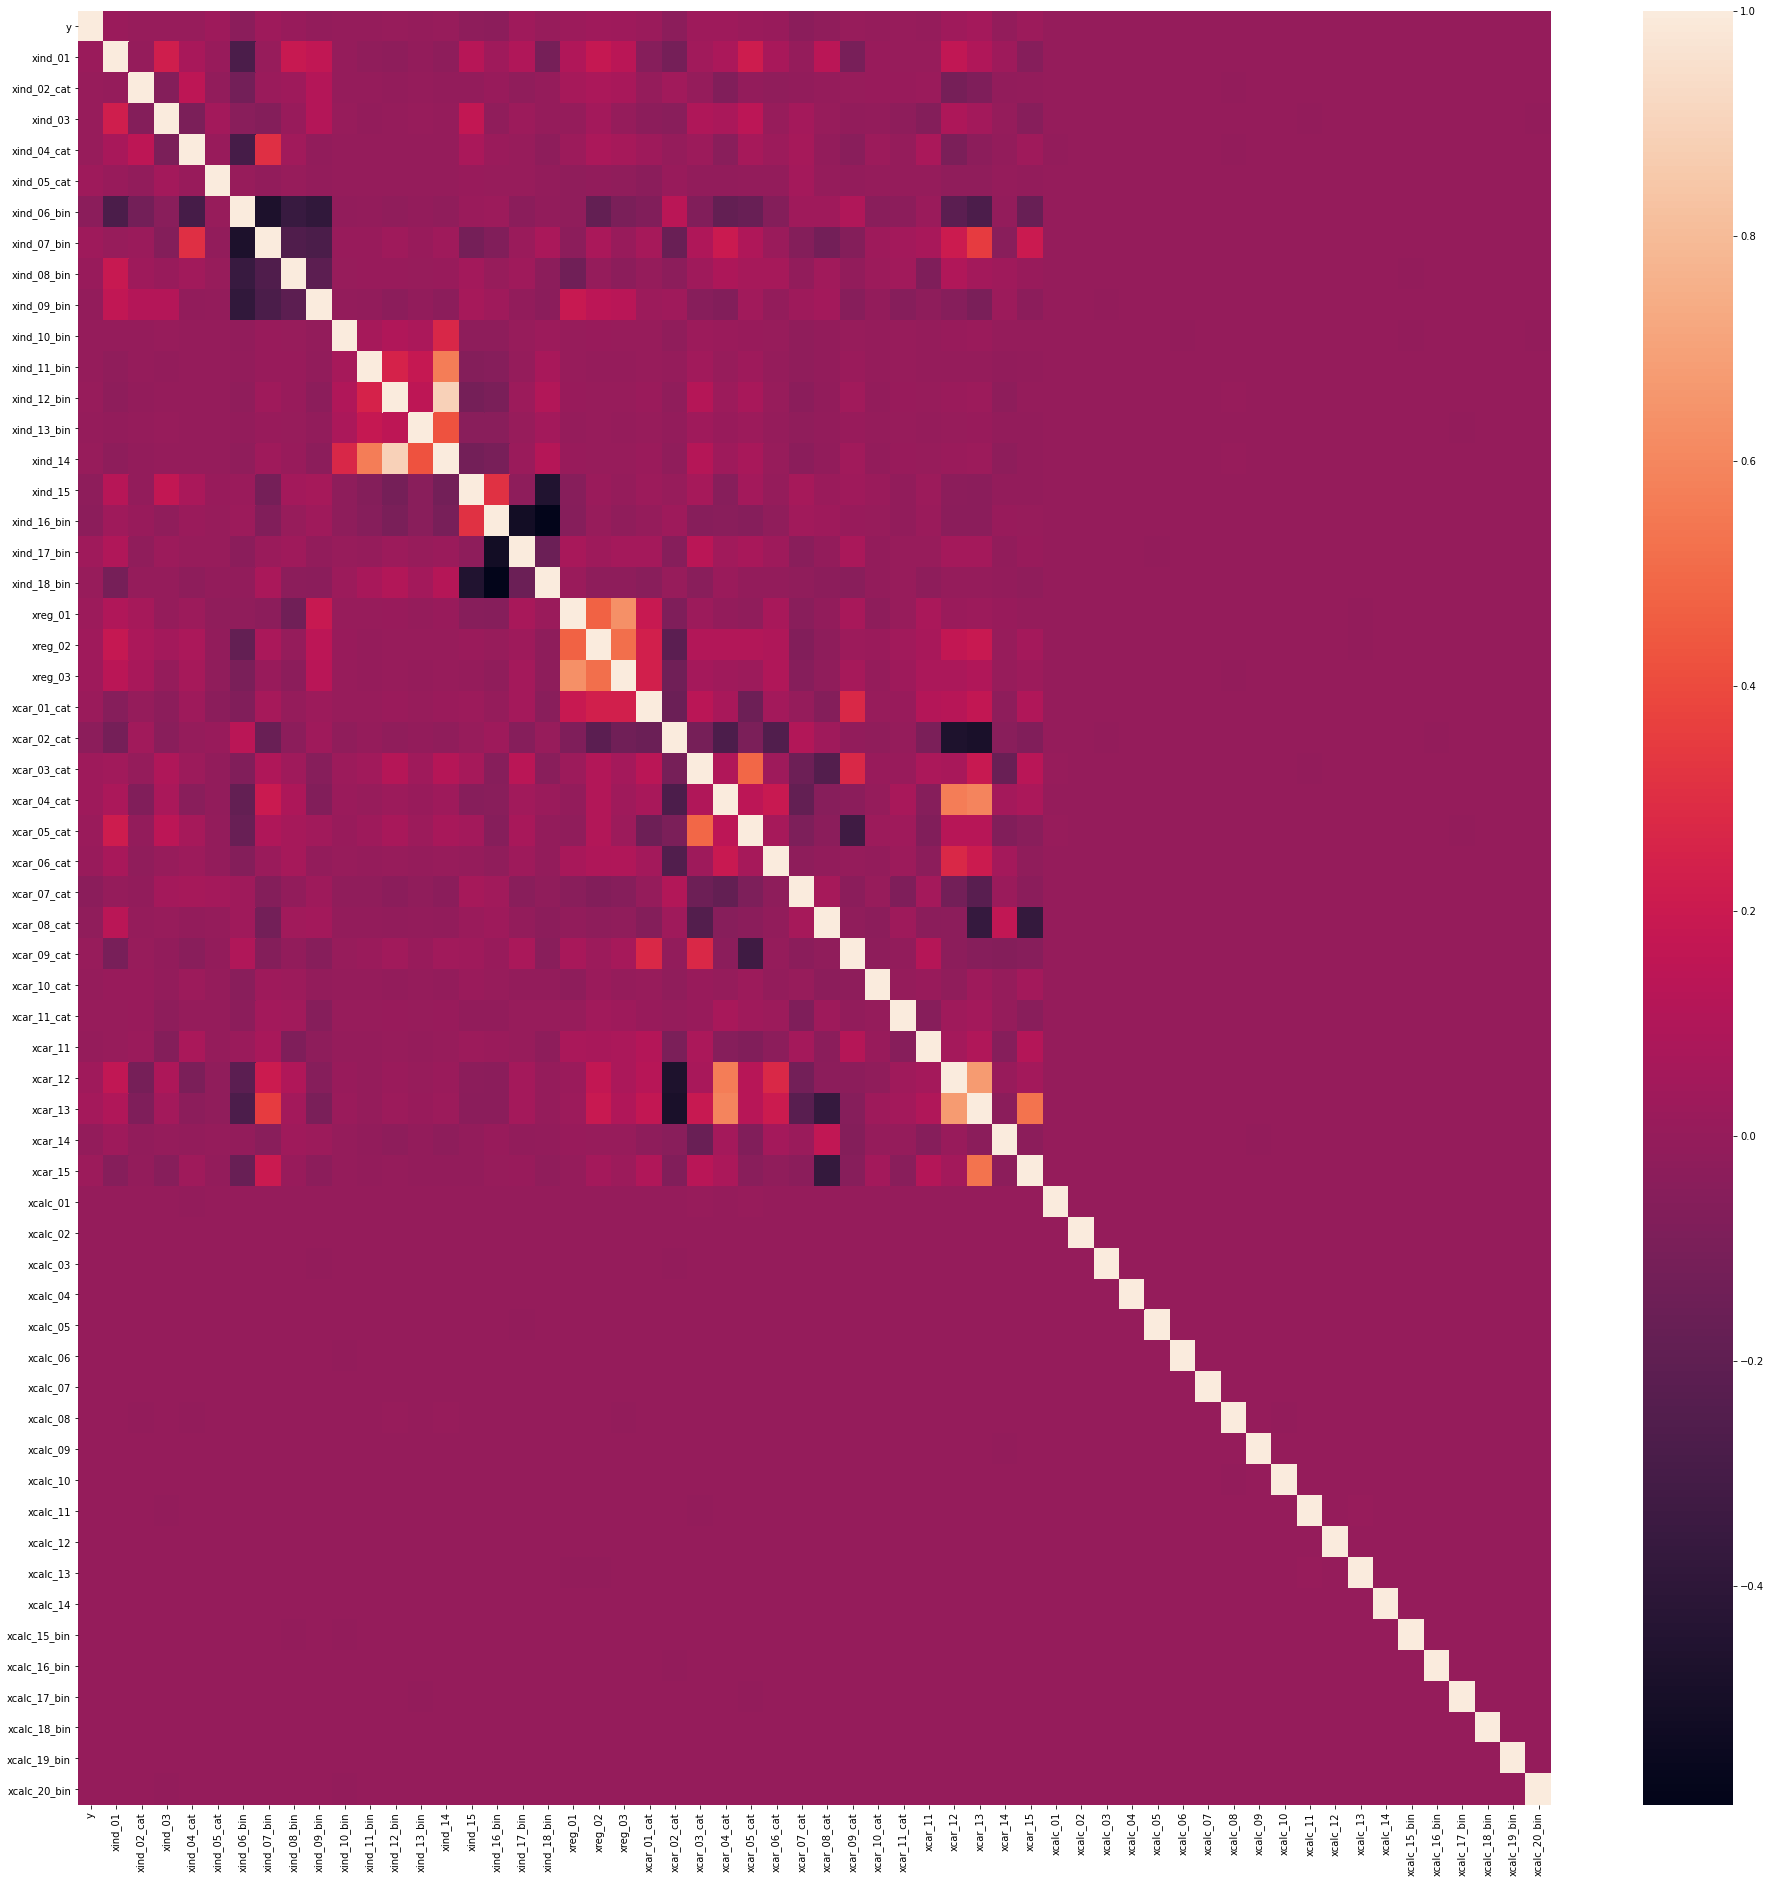

In [24]:
plt.subplots(figsize=(33,33))
sn.heatmap(corr, fmt='g')
plt.show()

Note: This correlation matrix is kind of... strange. The fact that columns xcalc_01 - Xcalc_20_bin have absolutely 0 correlation with every other column (even though 'xcalc' columns should correspond to a similar grouping) confuses me.

In [25]:
corr_columns = []
for col1 in df.columns:
    for col2 in df.columns:
        if (col1 != col2) & (abs(corr[col1][col2]) >= 0.6):
            if col1 in corr_columns or col2 in corr_columns:
                continue
            corr_columns.append(col1)
corr_columns

['xind_12_bin', 'xreg_01', 'xcar_12']

In [26]:
X_train_dr = X_train.drop(columns=corr_columns)
X_val_dr = X_val.drop(columns=corr_columns)

/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


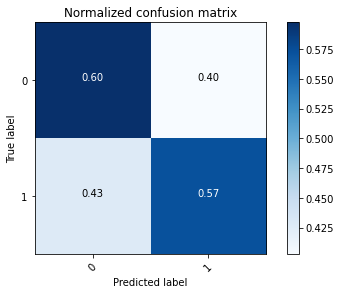

Accuracy:  0.596499149463427 
F1-score:  0.0942368886269888
Previous accuracy:  0.5977172018396791 
previous F1-score:  0.09423836205877485
Accuracy diff: -0.0012180523762521656, F1-score diff: -1.473431786053192e-06


In [27]:
acc, f1 = log_regression(X_train_dr, X_val_dr, y_train, y_val)
print('Accuracy: ', acc,'\nF1-score: ', f1)
print('Previous accuracy: ', acc_raw,'\nprevious F1-score: ', f1_raw)
print(f'Accuracy diff: {acc - acc_raw}, F1-score diff: {f1 - f1_raw}')

In [28]:
X_train = X_train_dr
X_val = X_val_dr
X_test = X_test.drop(columns=corr_columns)

# Use 2 binning methods
I'll have a look at the histograms of all columns to find the best candidates for the binning.

Histogram of column xind_01
[1 0 4 2 3 6 7 5]


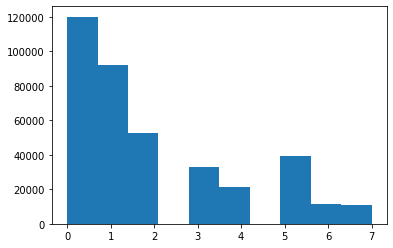

Histogram of column xind_02_cat
[ 1  2  4  3 -1]


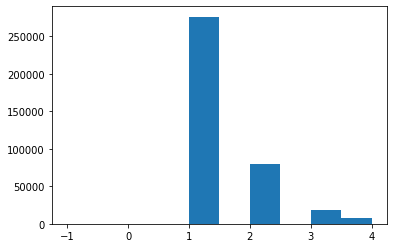

Histogram of column xind_03
[ 8  2  6  3  5  1  0 11  7  4 10  9]


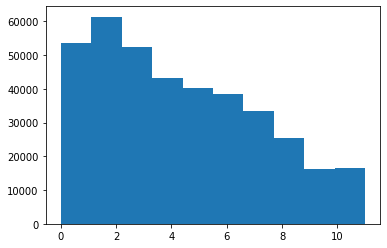

Histogram of column xind_04_cat
[ 0  1 -1]


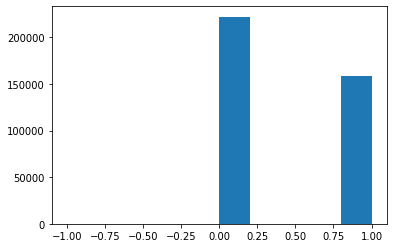

Histogram of column xind_05_cat
[ 0  4  6  3  1 -1  5  2]


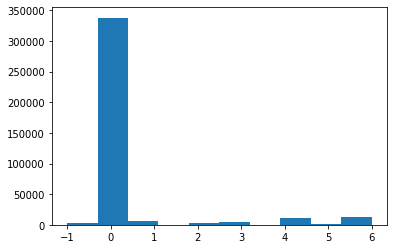

Histogram of column xind_06_bin
[0 1]


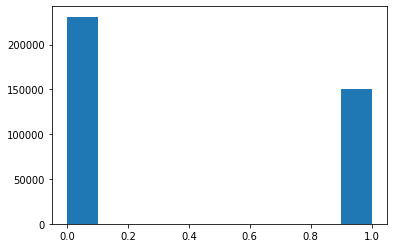

Histogram of column xind_07_bin
[0 1]


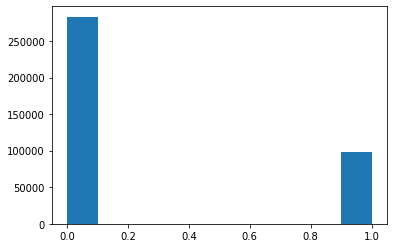

Histogram of column xind_08_bin
[1 0]


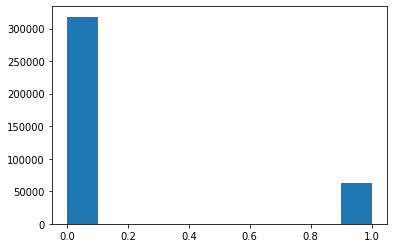

Histogram of column xind_09_bin
[0 1]


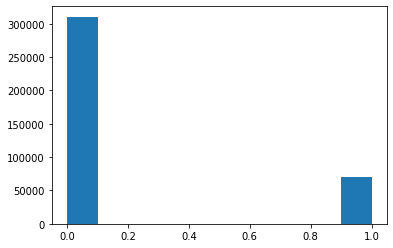

Histogram of column xind_10_bin
[0 1]


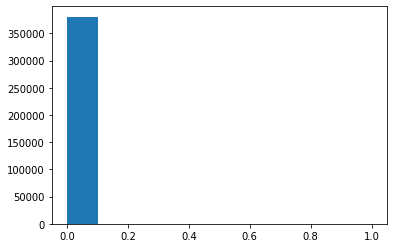

Histogram of column xind_11_bin
[0 1]


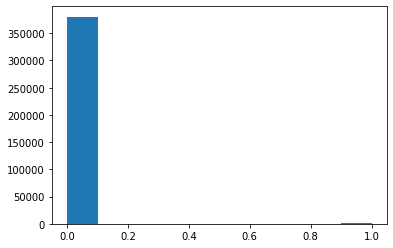

Histogram of column xind_13_bin
[0 1]


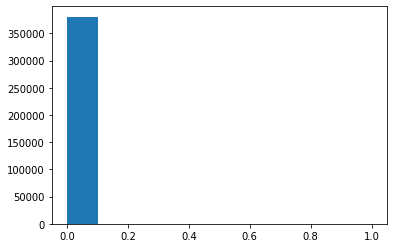

Histogram of column xind_14
[0 1 2 3 4]


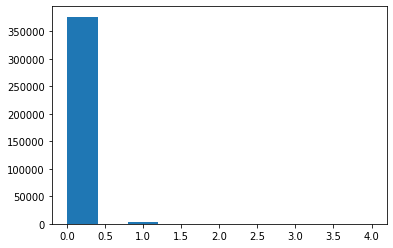

Histogram of column xind_15
[10 11 13  6  7  8  2 12  4  9  3  0  5  1]


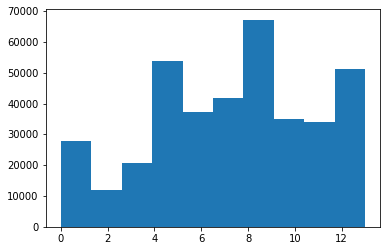

Histogram of column xind_16_bin
[1 0]


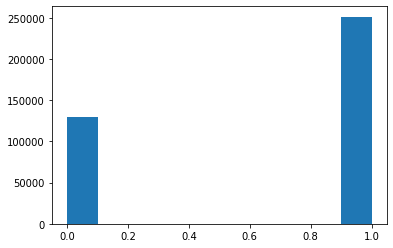

Histogram of column xind_17_bin
[0 1]


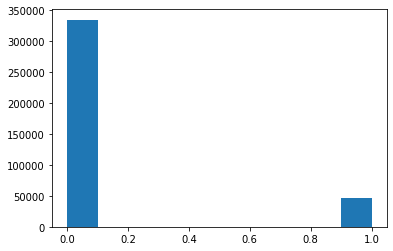

Histogram of column xind_18_bin
[0 1]


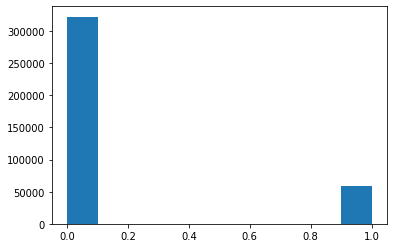

Histogram of column xreg_02
[0.8 0.4 0.2 0.6 0.  0.1 0.3 1.  1.2 0.5 0.7 1.5 1.6 0.9 1.8 1.3 1.4 1.7
 1.1]


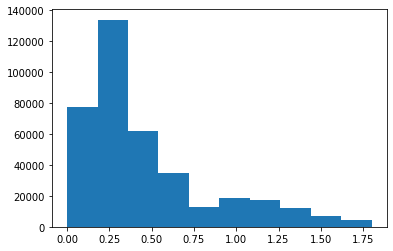

Histogram of column xreg_03
[ 1.46863031  0.9575359  -1.         ...  1.35115691  2.01602951
  1.68578617]


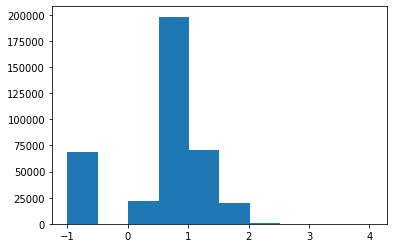

Histogram of column xcar_01_cat
[10  7 11  5  9  6  4  3  0  8  2  1 -1]


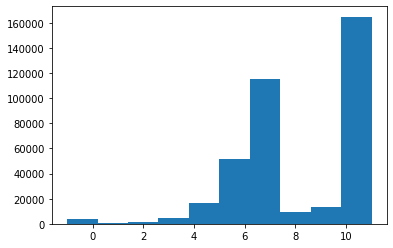

Histogram of column xcar_02_cat
[ 1  0 -1]


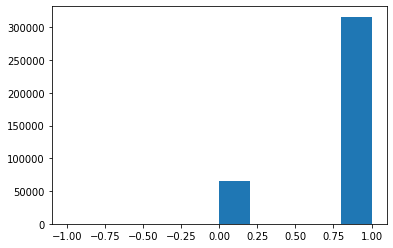

Histogram of column xcar_03_cat
[-1  0  1]


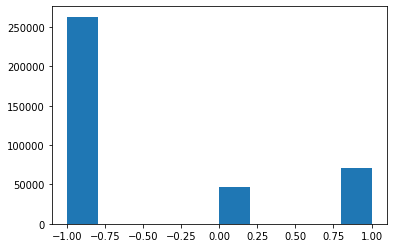

Histogram of column xcar_04_cat
[0 9 2 1 8 6 4 5 3 7]


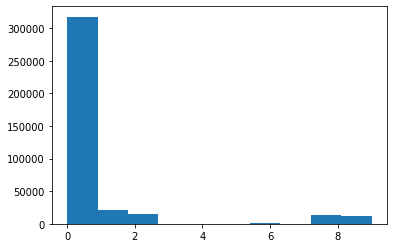

Histogram of column xcar_05_cat
[ 1 -1  0]


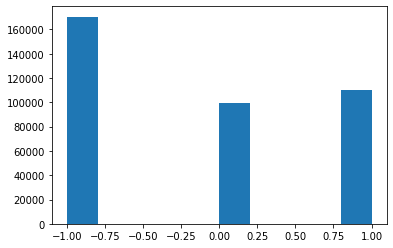

Histogram of column xcar_06_cat
[11  4 14  1 10  6  8  0 15  3  7  9 17 13 16 12  2  5]


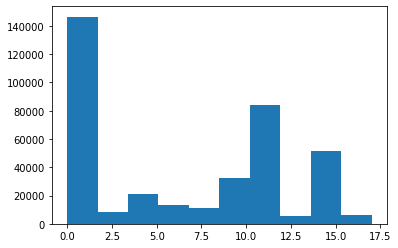

Histogram of column xcar_07_cat
[ 1  0 -1]


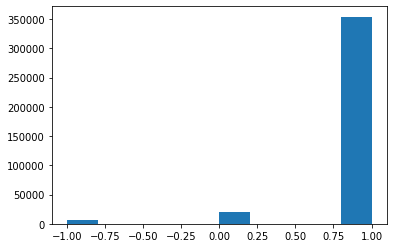

Histogram of column xcar_08_cat
[1 0]


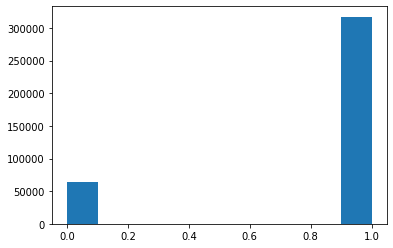

Histogram of column xcar_09_cat
[ 0  2  1  3  4 -1]


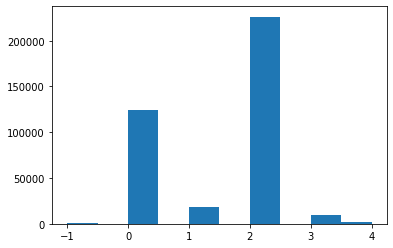

Histogram of column xcar_10_cat
[1 0 2]


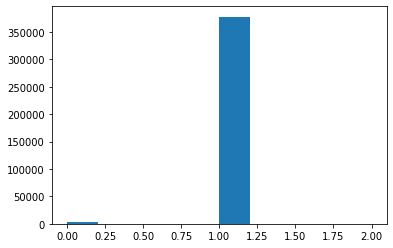

Histogram of column xcar_11_cat
[101  19  84  82  51  65  89  77  49  67 104  86  98  42   5  26  12  22
  38  17  46  30  95  53  33 103  87  60  81  15  64  25  32  73  55  10
  57  39  56  48  27  91  79  99  28  75  85  92  68  31  93  70  83   7
  16  71  13  11  47  90   4 102  69  80  29  34  61  44  94  21  18  23
   2  66  78  36  62  40  52  96 100  74  43  88   8   6  14  24  41   3
  20   1  37  76  50   9  72  54  63  59  45  35  97  58]


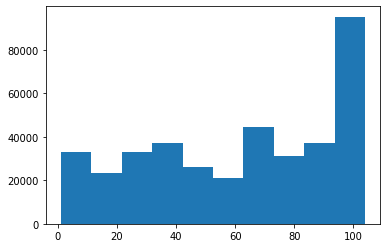

Histogram of column xcar_11
[ 3  2  1  0 -1]


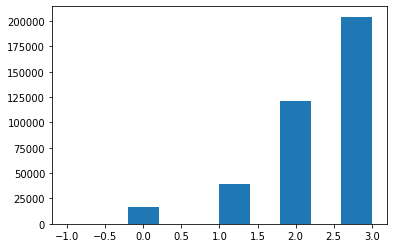

Histogram of column xcar_13
[0.78624539 0.53824785 0.64738827 ... 1.07056793 1.0398645  1.09901723]


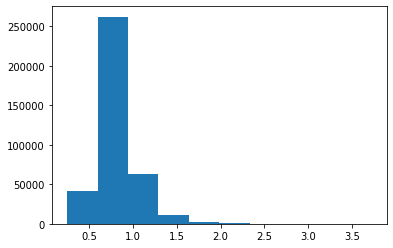

Histogram of column xcar_14
[ 0.38509739  0.37349699  0.32015621  0.36851052  0.33075671  0.35213634
  0.41012193  0.38742741 -1.          0.36660606  0.39937451  0.39749214
  0.39370039  0.39585351  0.39076847  0.37080992  0.37456642  0.29916551
  0.36633318  0.44777226  0.40137264  0.42190046  0.39319206  0.28879058
  0.36152455  0.34727511  0.35707142  0.49759421  0.41036569  0.34539832
  0.35832946  0.40249224  0.42083251  0.36400549  0.4180909   0.41749251
  0.35972212  0.39874804  0.37682887  0.32863353  0.30708305  0.3744329
  0.36124784  0.428369    0.3748333   0.35171011  0.40865633  0.39
  0.35071356  0.39382737  0.33615473  0.36878178  0.38209946  0.30413813
  0.44407207  0.30166206  0.37469988  0.31937439  0.37881394  0.39962482
  0.41231056  0.38366652  0.34438351  0.38858718  0.3241913   0.38729833
  0.41856899  0.41291646  0.29444864  0.39306488  0.38871583  0.38496753
  0.49497475  0.32480764  0.40099875  0.39912404  0.43634848  0.52297227
  0.30331502  0.40174619  0.32

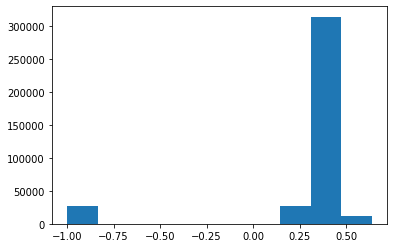

Histogram of column xcar_15
[3.31662479 1.41421356 3.         3.60555128 3.74165739 3.16227766
 2.44948974 2.82842712 3.46410162 0.         1.73205081 2.64575131
 2.         2.23606798 1.        ]


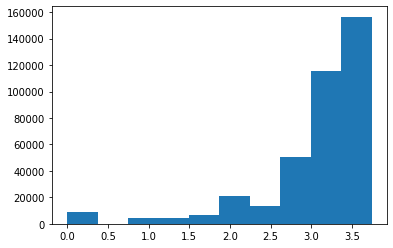

Histogram of column xcalc_01
[0.1 0.4 0.5 0.  0.2 0.3 0.6 0.9 0.8 0.7]


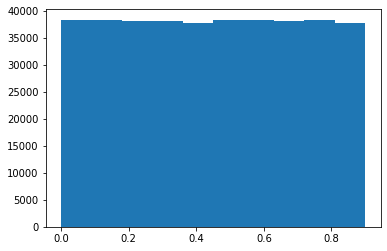

Histogram of column xcalc_02
[0.2 0.4 0.  0.1 0.8 0.5 0.6 0.9 0.7 0.3]


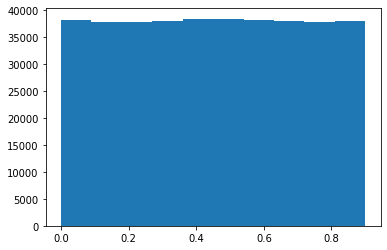

Histogram of column xcalc_03
[0.3 0.  0.7 0.4 0.8 0.6 0.2 0.9 0.5 0.1]


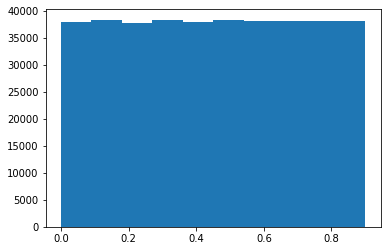

Histogram of column xcalc_04
[2 0 4 3 1 5]


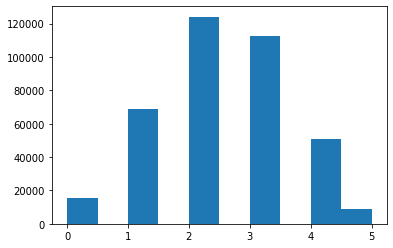

Histogram of column xcalc_05
[3 4 2 0 1 5 6]


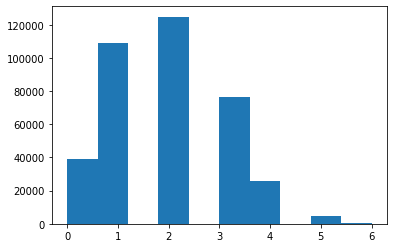

Histogram of column xcalc_06
[ 9  7  4  8  6 10  5  3  2  1  0]


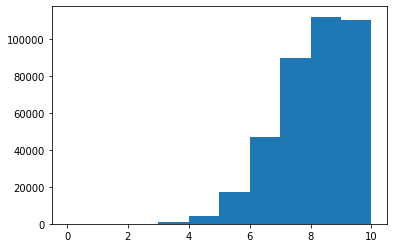

Histogram of column xcalc_07
[2 3 5 1 6 4 0 7 8 9]


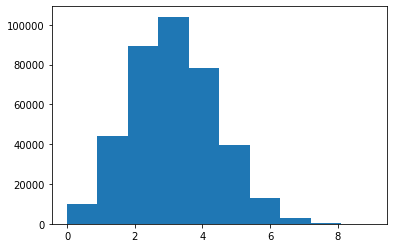

Histogram of column xcalc_08
[ 9  8 11 12  7 10  6  5  4  3  2]


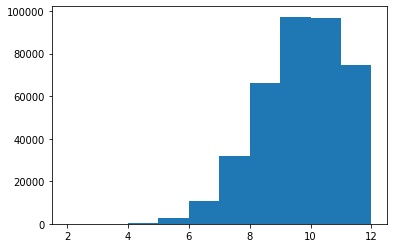

Histogram of column xcalc_09
[4 3 0 2 1 5 6 7]


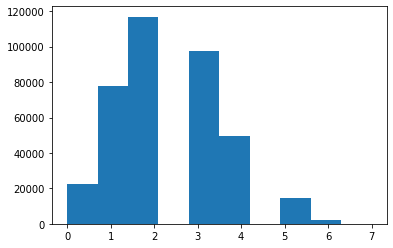

Histogram of column xcalc_10
[ 8 17  7  2  9  6 14  4 10  5 12 15 11  3 13  1 20 16 18 22 19 21  0 23
 25]


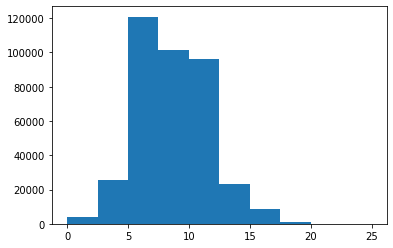

Histogram of column xcalc_11
[ 4  5  7  0  6  1 11 10  3  9  2  8 12 13 14 15 16 18 17 19]


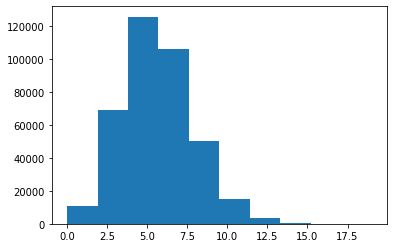

Histogram of column xcalc_12
[ 0  1  2  4  3  5  6  8  7  9 10]


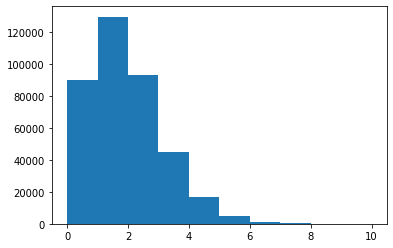

Histogram of column xcalc_13
[ 3  1  5  0  2  9  4  6 10  8  7 11 12 13]


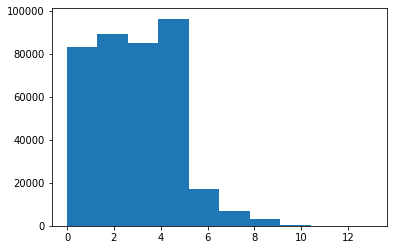

Histogram of column xcalc_14
[ 6  9  8  7 10 13 12  3 17  4  5 11  2 15 14 16  1  0 18 19 21 20 23 22]


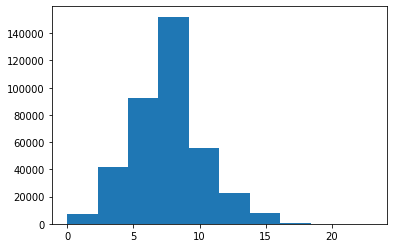

Histogram of column xcalc_15_bin
[0 1]


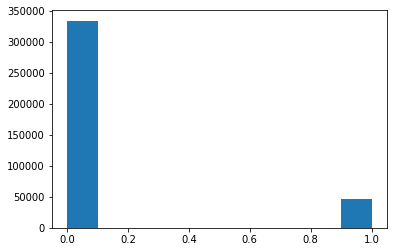

Histogram of column xcalc_16_bin
[1 0]


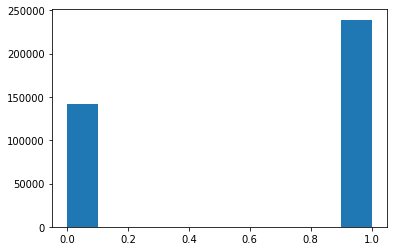

Histogram of column xcalc_17_bin
[0 1]


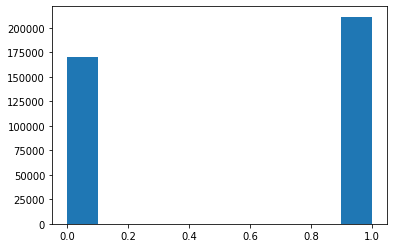

Histogram of column xcalc_18_bin
[0 1]


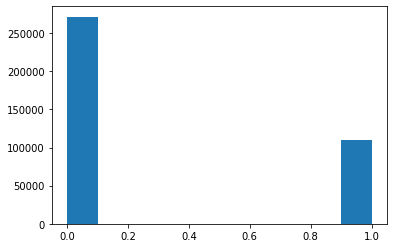

Histogram of column xcalc_19_bin
[0 1]


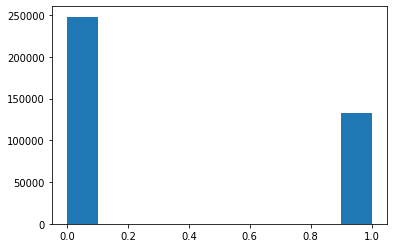

Histogram of column xcalc_20_bin
[0 1]


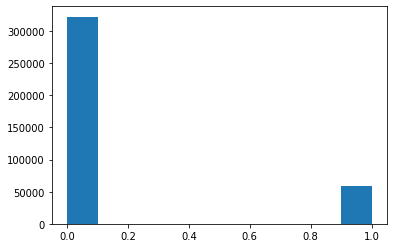

In [29]:
for c in X_train.columns:
    plt.hist(X_train[c], label=f'Histogram of column {c}')
    print(f'Histogram of column {c}')
    print(X_train[c].unique())
    plt.show()

As we can see, there are some columns (xcalc_01, xcalc_02, xcalc_03) that contain floats and are already well distributed - their histogram has +- equal height all the time. I'll use binning with equal width. I'll try to perform the binning to different number of bins and choose the best value then.

### Well distributed floats:

In [30]:
def bin_columns(cols, i):
    X_train_copy = X_train.copy()
    X_val_copy = X_val.copy()
    X_test_copy = X_test.copy()
    for col in cols:
        X_train_copy[col] = pd.cut(X_train[col], i)
        bins = sorted(list(map(lambda x: x.right, X_train_copy[col].unique().astype(pd.Interval)))[:-1])
        bins = [-float("inf")] + bins + [float("inf")]
        X_val_copy[col] = pd.cut(X_val[col], bins)
        X_test_copy[col] = pd.cut(X_test[col], bins)
       
    X_train_copy[cols] = X_train_copy[cols].apply(lambda x: x.cat.codes)
    X_val_copy[cols] = X_val_copy[cols].apply(lambda x: x.cat.codes)
    X_test_copy[cols] = X_test_copy[cols].apply(lambda x: x.cat.codes)
    return X_train_copy, X_val_copy, X_test_copy

In [31]:
def plot_stats(my_range, acc_list, f1_list, xlabel, acc_prev, f1_prev):
    plt.plot(my_range, acc_list)
    plt.title('Accuracy')
    plt.xlabel(xlabel)
    plt.ylabel('accuracy')
    plt.plot([my_range[0], my_range[-1]], [acc_prev, acc_prev], 'k-')
    plt.show()

    plt.plot(my_range, f1_list)
    plt.title('F1 score')
    plt.xlabel(xlabel)
    plt.ylabel('f1 score')
    plt.plot([my_range[0], my_range[-1]], [f1_prev, f1_prev], 'k-')
    plt.show()

In [32]:
def try_binning(cols_to_bin, my_range):
    acc_list = []
    f1_list = []

    for i in my_range:
        X_train_copy, X_val_copy, X_test_copy = bin_columns(cols_to_bin, i)
    
        print(f'Logistic regression, binning on "{cols_to_bin}" with equal width, i={i}')
        acc, f1 = log_regression(X_train_copy, X_val_copy, y_train, y_val)
        acc_list.append(acc)
        f1_list.append(f1)
        print('Accuracy: ', acc,'\nF1-score: ', f1)
    plot_stats(my_range, acc_list, f1_list, 'nr of bins', acc_prev, f1_prev)
    return acc_list, f1_list

In [33]:
acc_prev = acc_raw
f1_prev = f1_raw

Logistic regression, binning on "['xcalc_01']" with equal width, i=2


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


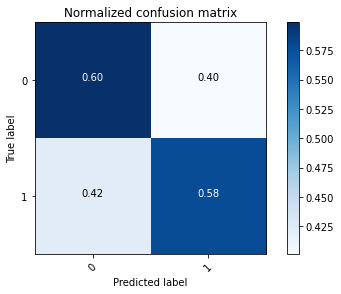

Accuracy:  0.5979482117731062 
F1-score:  0.09518633173429118
Logistic regression, binning on "['xcalc_01']" with equal width, i=3


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


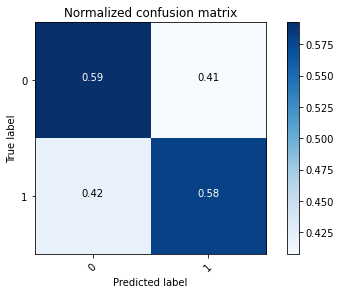

Accuracy:  0.591847449440326 
F1-score:  0.0942771926554199
Logistic regression, binning on "['xcalc_01']" with equal width, i=4


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


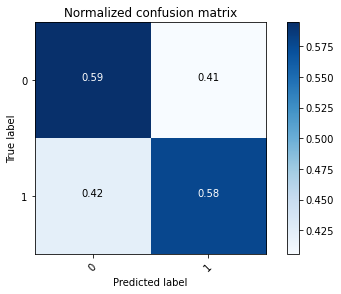

Accuracy:  0.5939790410987672 
F1-score:  0.09438602243717358
Logistic regression, binning on "['xcalc_01']" with equal width, i=5


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


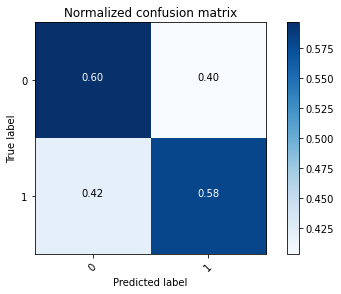

Accuracy:  0.5959216246298591 
F1-score:  0.09522242076554124
Logistic regression, binning on "['xcalc_01']" with equal width, i=6


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


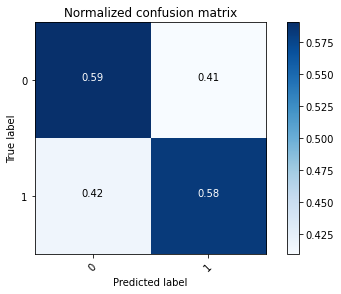

Accuracy:  0.5901883781002583 
F1-score:  0.09451997587118927
Logistic regression, binning on "['xcalc_01']" with equal width, i=7


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


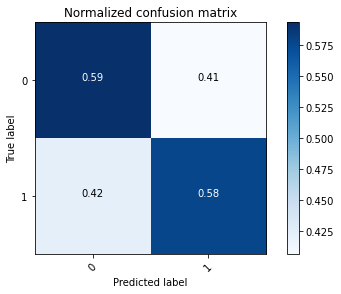

Accuracy:  0.592708486464918 
F1-score:  0.09411929562333599
Logistic regression, binning on "['xcalc_01']" with equal width, i=8


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


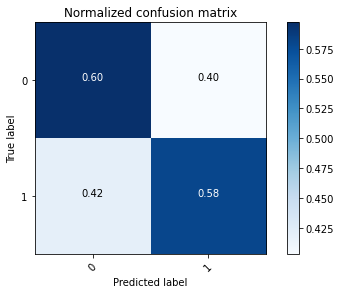

Accuracy:  0.5964886490119075 
F1-score:  0.09534347191487358
Logistic regression, binning on "['xcalc_01']" with equal width, i=9


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


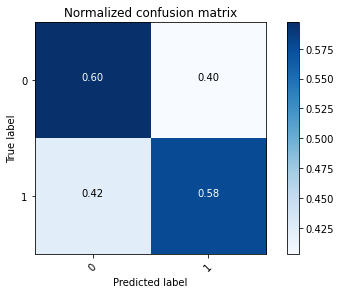

Accuracy:  0.5962576390784804 
F1-score:  0.0946976831795065
Logistic regression, binning on "['xcalc_01']" with equal width, i=10


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


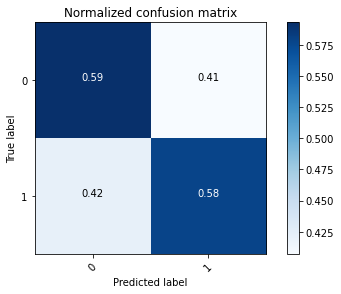

Accuracy:  0.5924984774345297 
F1-score:  0.09424450357092844
Logistic regression, binning on "['xcalc_01']" with equal width, i=11


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


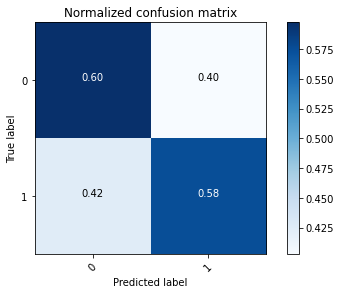

Accuracy:  0.5966146544301405 
F1-score:  0.09468822170900694
Logistic regression, binning on "['xcalc_01']" with equal width, i=12


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


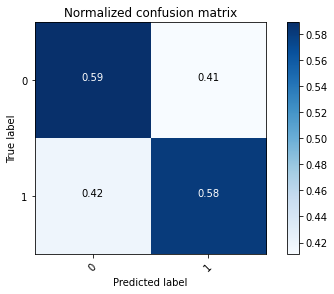

Accuracy:  0.5886763130814625 
F1-score:  0.09382807439622468
Logistic regression, binning on "['xcalc_01']" with equal width, i=13


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


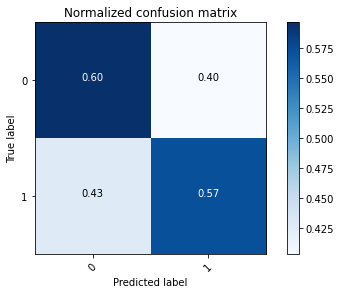

Accuracy:  0.5956801142449125 
F1-score:  0.09414919895546615
Logistic regression, binning on "['xcalc_01']" with equal width, i=14


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


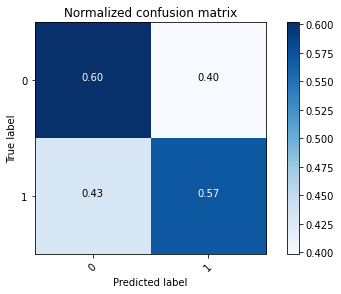

Accuracy:  0.6006678287166348 
F1-score:  0.09486862147753237
Logistic regression, binning on "['xcalc_01']" with equal width, i=15


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


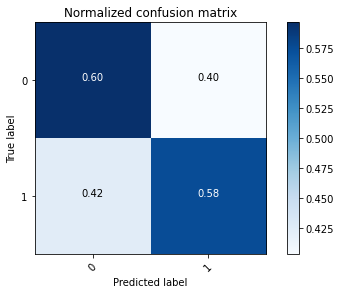

Accuracy:  0.5957536174055484 
F1-score:  0.0945055978925581
Logistic regression, binning on "['xcalc_01']" with equal width, i=16


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


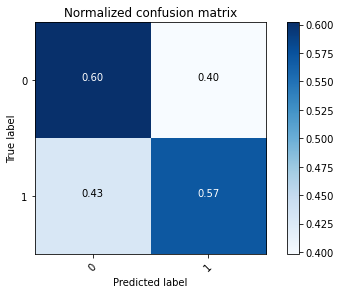

Accuracy:  0.6007623327803095 
F1-score:  0.09480275218436778
Logistic regression, binning on "['xcalc_01']" with equal width, i=17


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


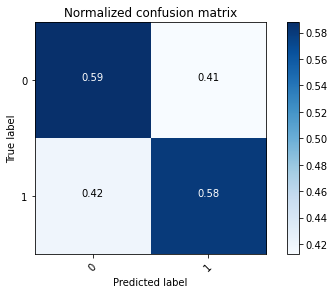

Accuracy:  0.5874477602536909 
F1-score:  0.09353298110421522
Logistic regression, binning on "['xcalc_01']" with equal width, i=18


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


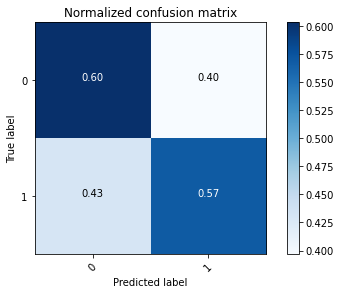

Accuracy:  0.6020328874141588 
F1-score:  0.09490375889573482
Logistic regression, binning on "['xcalc_01']" with equal width, i=19


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


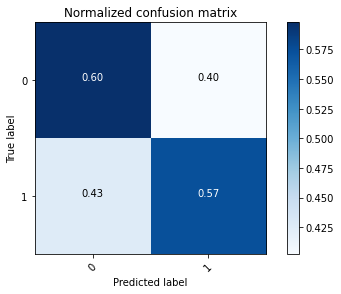

Accuracy:  0.5970136715878783 
F1-score:  0.09460224591865622


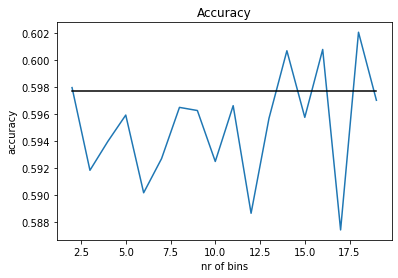

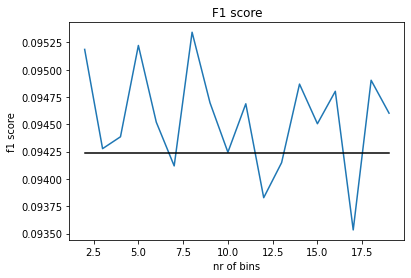

In [34]:
acc_list, f1_list = try_binning(['xcalc_01'], range (2, 20))

No huge changes, but I'll choose the number of bins that brings the best F1 score (if is better than previous F1)

In [35]:
best = max(zip(acc_list, f1_list, range(2, 20)), key=lambda x: x[1])
print(best)

if (best[1] > f1_prev):
    X_train, X_val, X_test = bin_columns(['xcalc_01'], best[2])
    acc_prev = best[0]
    f1_prev = best[1]

(0.5964886490119075, 0.09534347191487358, 8)


Logistic regression, binning on "['xcalc_02']" with equal width, i=2


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


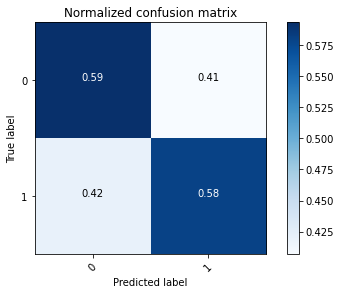

Accuracy:  0.5926349833042821 
F1-score:  0.09448451322269681
Logistic regression, binning on "['xcalc_02']" with equal width, i=3


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


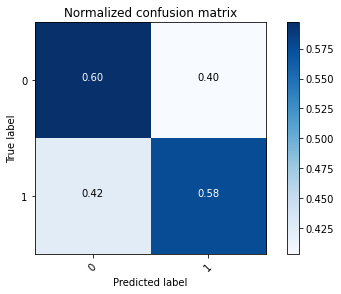

Accuracy:  0.5962156372724027 
F1-score:  0.0946035034846487
Logistic regression, binning on "['xcalc_02']" with equal width, i=4


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


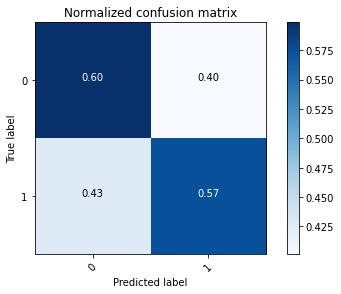

Accuracy:  0.5976962009366402 
F1-score:  0.09479031305375074
Logistic regression, binning on "['xcalc_02']" with equal width, i=5


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


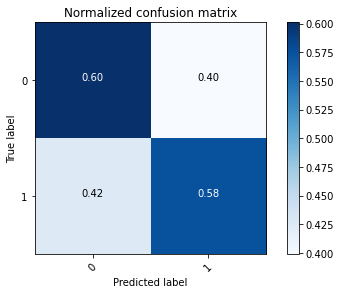

Accuracy:  0.6001113047861057 
F1-score:  0.09548013205709806
Logistic regression, binning on "['xcalc_02']" with equal width, i=6


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


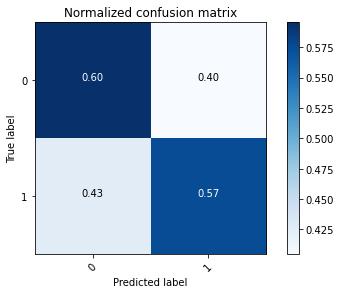

Accuracy:  0.5945460654808157 
F1-score:  0.09403815020764413
Logistic regression, binning on "['xcalc_02']" with equal width, i=7


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


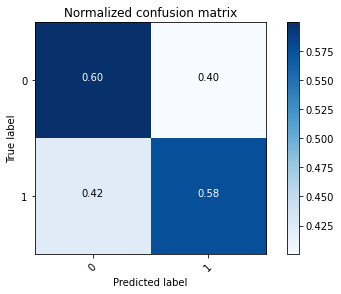

Accuracy:  0.5987882478946595 
F1-score:  0.09523809523809523
Logistic regression, binning on "['xcalc_02']" with equal width, i=8


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


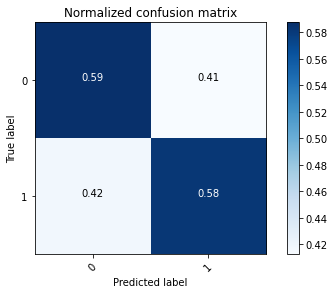

Accuracy:  0.5873007539324191 
F1-score:  0.09379539323511102
Logistic regression, binning on "['xcalc_02']" with equal width, i=9


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


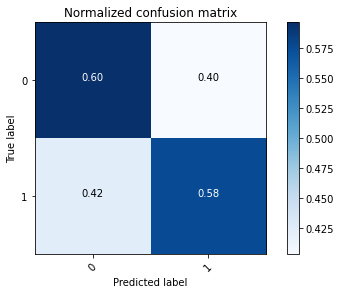

Accuracy:  0.5957536174055484 
F1-score:  0.09454819135424997
Logistic regression, binning on "['xcalc_02']" with equal width, i=10


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


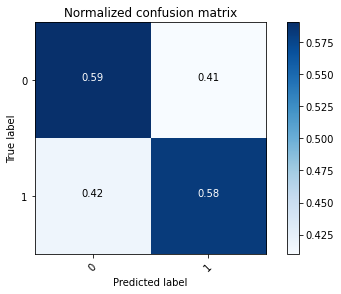

Accuracy:  0.58997836906987 
F1-score:  0.09426609760623493
Logistic regression, binning on "['xcalc_02']" with equal width, i=11


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


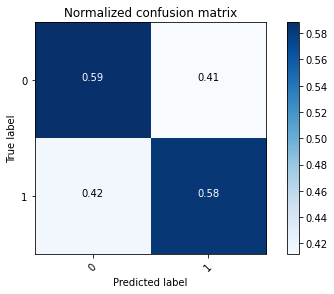

Accuracy:  0.5880462859902976 
F1-score:  0.09407472405671269
Logistic regression, binning on "['xcalc_02']" with equal width, i=12


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


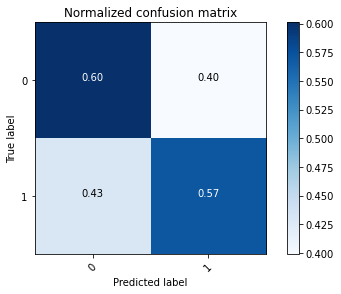

Accuracy:  0.600016800722431 
F1-score:  0.09472883692190692
Logistic regression, binning on "['xcalc_02']" with equal width, i=13


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


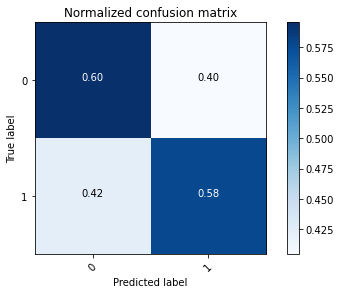

Accuracy:  0.5947875758657623 
F1-score:  0.09459903336305196
Logistic regression, binning on "['xcalc_02']" with equal width, i=14


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


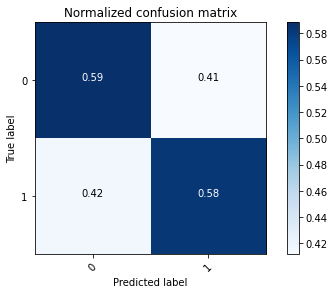

Accuracy:  0.5882457945691665 
F1-score:  0.09411601635594982
Logistic regression, binning on "['xcalc_02']" with equal width, i=15


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


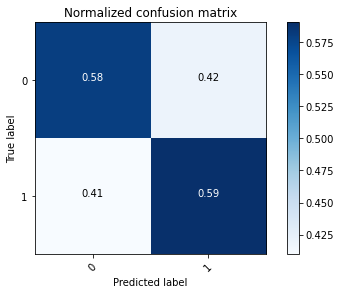

Accuracy:  0.580422958187202 
F1-score:  0.09351179673321235
Logistic regression, binning on "['xcalc_02']" with equal width, i=16


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


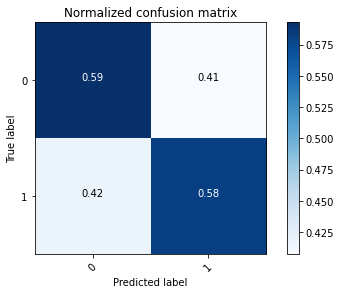

Accuracy:  0.5923514711132579 
F1-score:  0.09467841984982044
Logistic regression, binning on "['xcalc_02']" with equal width, i=17


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


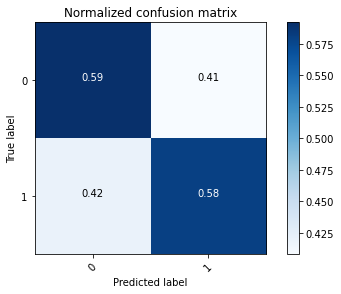

Accuracy:  0.5914904340886659 
F1-score:  0.09432908092001117
Logistic regression, binning on "['xcalc_02']" with equal width, i=18


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


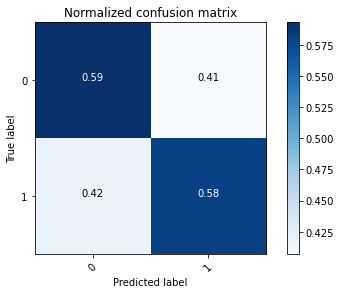

Accuracy:  0.5926139824012433 
F1-score:  0.0946914012367285
Logistic regression, binning on "['xcalc_02']" with equal width, i=19


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


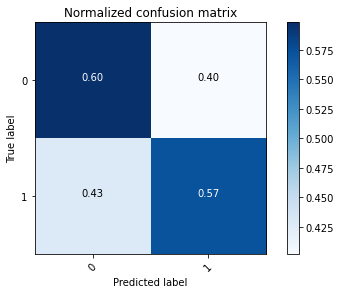

Accuracy:  0.5971606779091501 
F1-score:  0.09424874870148266


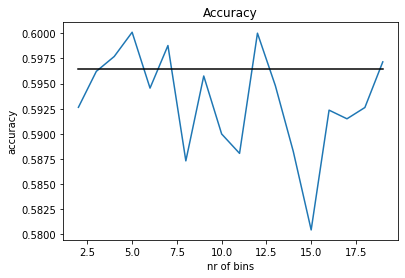

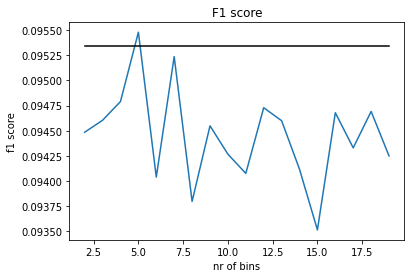

(0.6001113047861057, 0.09548013205709806, 5)


In [36]:
acc_list, f1_list = try_binning(['xcalc_02'], range (2, 20))
best = max(zip(acc_list, f1_list, range(2, 20)), key=lambda x: x[1])
print(best)

if (best[1] > f1_prev):
    X_train, X_val, X_test = bin_columns(['xcalc_02'], best[2])
    acc_prev = best[0]
    f1_prev = best[1]

Logistic regression, binning on "['xcalc_03']" with equal width, i=2


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


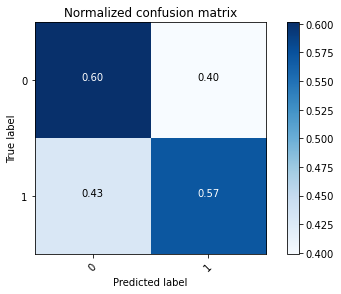

Accuracy:  0.6001848079467417 
F1-score:  0.09480791175351845
Logistic regression, binning on "['xcalc_03']" with equal width, i=3


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


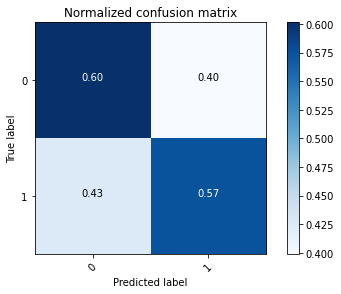

Accuracy:  0.6003108133649747 
F1-score:  0.09526525955504848
Logistic regression, binning on "['xcalc_03']" with equal width, i=4


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


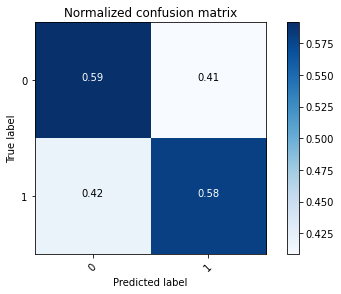

Accuracy:  0.5910704160278892 
F1-score:  0.09419919058473275
Logistic regression, binning on "['xcalc_03']" with equal width, i=5


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


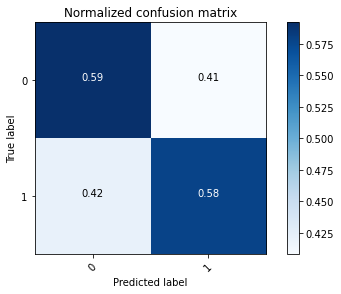

Accuracy:  0.5914904340886659 
F1-score:  0.09403381305016069
Logistic regression, binning on "['xcalc_03']" with equal width, i=6


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


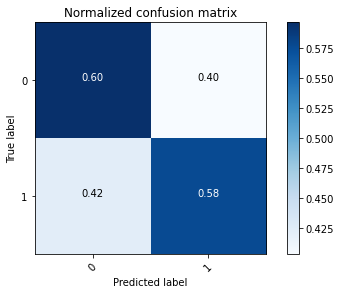

Accuracy:  0.5959741268874562 
F1-score:  0.09480791399063683
Logistic regression, binning on "['xcalc_03']" with equal width, i=7


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


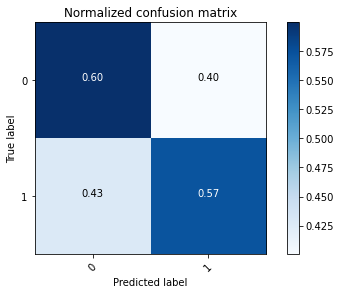

Accuracy:  0.5985257366066741 
F1-score:  0.09458179407028512
Logistic regression, binning on "['xcalc_03']" with equal width, i=8


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


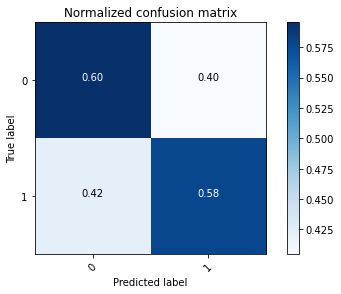

Accuracy:  0.5947035722536069 
F1-score:  0.09470869687587953
Logistic regression, binning on "['xcalc_03']" with equal width, i=9


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


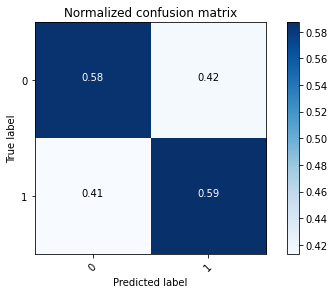

Accuracy:  0.5846021378919294 
F1-score:  0.09390746678882272
Logistic regression, binning on "['xcalc_03']" with equal width, i=10


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


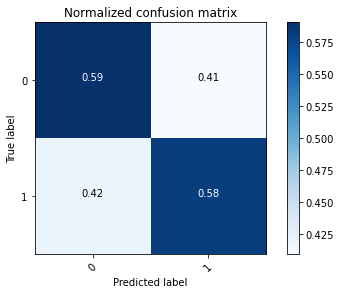

Accuracy:  0.5902828821639331 
F1-score:  0.09416134648868253
Logistic regression, binning on "['xcalc_03']" with equal width, i=11


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


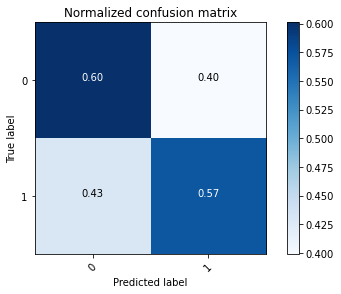

Accuracy:  0.5999012957557175 
F1-score:  0.09466105923444294
Logistic regression, binning on "['xcalc_03']" with equal width, i=12


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


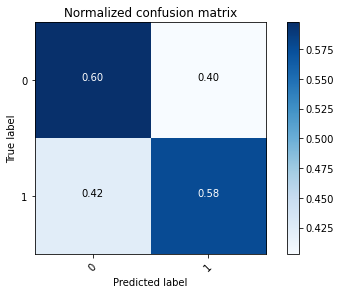

Accuracy:  0.5966461557846987 
F1-score:  0.09490822553662731
Logistic regression, binning on "['xcalc_03']" with equal width, i=13


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


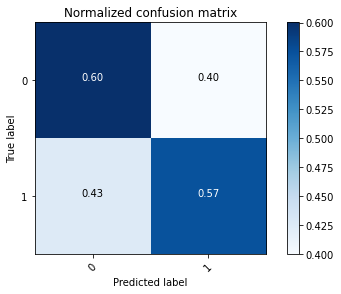

Accuracy:  0.599155763697839 
F1-score:  0.09497392128971076
Logistic regression, binning on "['xcalc_03']" with equal width, i=14


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


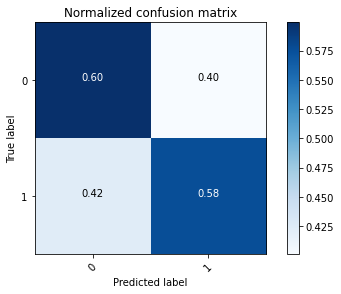

Accuracy:  0.5982842262217275 
F1-score:  0.09517277264019298
Logistic regression, binning on "['xcalc_03']" with equal width, i=15


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


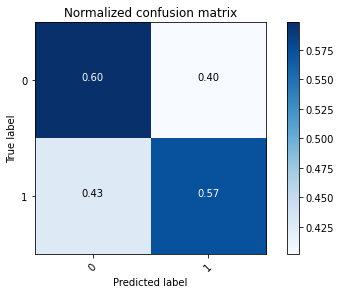

Accuracy:  0.5973706869395384 
F1-score:  0.09450715533934728
Logistic regression, binning on "['xcalc_03']" with equal width, i=16


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


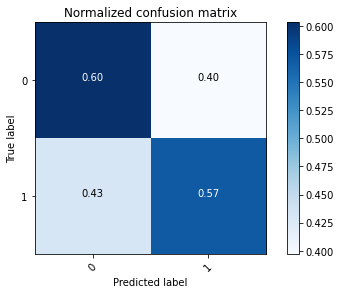

Accuracy:  0.6017913770292123 
F1-score:  0.09493806830385909
Logistic regression, binning on "['xcalc_03']" with equal width, i=17


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


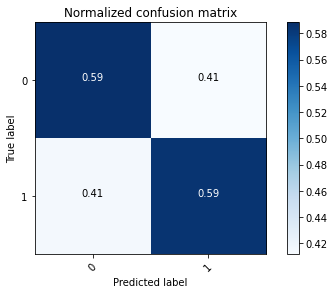

Accuracy:  0.5882352941176471 
F1-score:  0.09436489607390301
Logistic regression, binning on "['xcalc_03']" with equal width, i=18


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


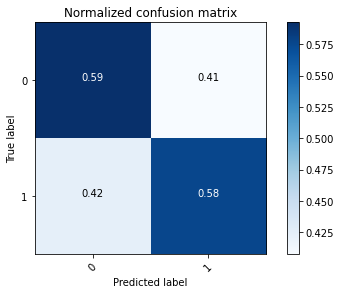

Accuracy:  0.5919314530524813 
F1-score:  0.09387241186345832
Logistic regression, binning on "['xcalc_03']" with equal width, i=19


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


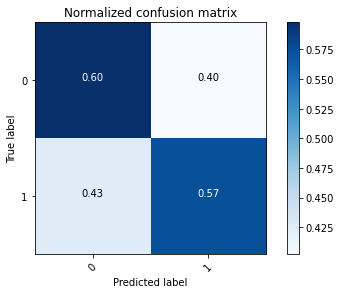

Accuracy:  0.5970241720393977 
F1-score:  0.09464719620656302


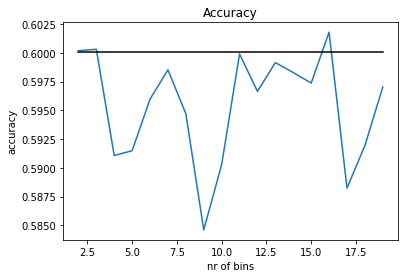

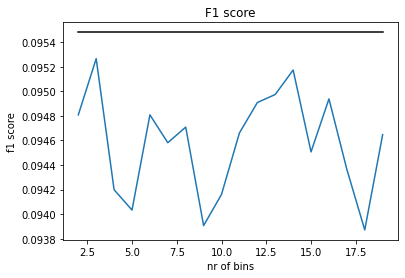

(0.6003108133649747, 0.09526525955504848, 3)


In [37]:
acc_list, f1_list = try_binning(['xcalc_03'], range (2, 20))
best = max(zip(acc_list, f1_list, range(2, 20)), key=lambda x: x[1])
print(best)

if (best[1] > f1_prev):
    X_train, X_val, X_test = bin_columns(['xcalc_03'], best[2])
    acc_prev = best[0]
    f1_prev = best[1]

### Now the floats that are not so well distributed

In [38]:
def bin_columns_height(cols, i):
    X_train_copy = X_train.copy()
    X_val_copy = X_val.copy()
    X_test_copy = X_test.copy()
    for col in cols:
        X_train_copy[col] = pd.qcut(X_train[col], i, duplicates='drop')
        bins = sorted(list(map(lambda x: x.right, X_train_copy[col].unique().astype(pd.Interval)))[:-1])
        bins = [-float("inf")] + bins + [float("inf")]
        X_val_copy[col] = pd.cut(X_val[col], bins)
        X_test_copy[col] = pd.cut(X_test[col], bins)
       
    X_train_copy[cols] = X_train_copy[cols].apply(lambda x: x.cat.codes)
    X_val_copy[cols] = X_val_copy[cols].apply(lambda x: x.cat.codes)
    X_test_copy[cols] = X_test_copy[cols].apply(lambda x: x.cat.codes)
    return X_train_copy, X_val_copy, X_test_copy

In [39]:
def try_binning_eqH(cols_to_bin, my_range):
    acc_list = []
    f1_list = []

    for i in my_range:
        X_train_copy, X_val_copy, X_test_copy = bin_columns_height(cols_to_bin, i)
    
        print(f'Logistic regression, binning on "{cols_to_bin}" with equal width, i={i}')
        acc, f1 = log_regression(X_train_copy, X_val_copy, y_train, y_val)
        acc_list.append(acc)
        f1_list.append(f1)
        print('Accuracy: ', acc,'\nF1-score: ', f1)
    plot_stats(my_range, acc_list, f1_list, 'nr of bins', acc_prev, f1_prev)
    return acc_list, f1_list

Logistic regression, binning on "['xreg_03']" with equal width, i=2


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


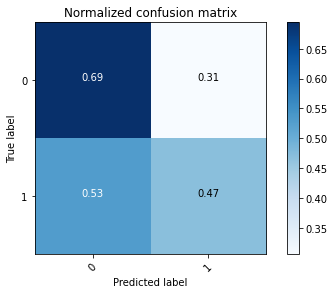

Accuracy:  0.6859209946027679 
F1-score:  0.09898484802843631
Logistic regression, binning on "['xreg_03']" with equal width, i=3


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


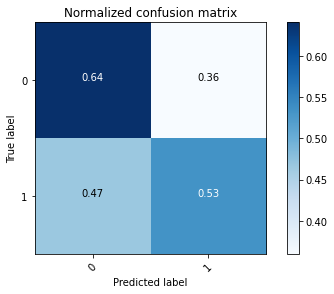

Accuracy:  0.63667387697671 
F1-score:  0.09716894977168951
Logistic regression, binning on "['xreg_03']" with equal width, i=4


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


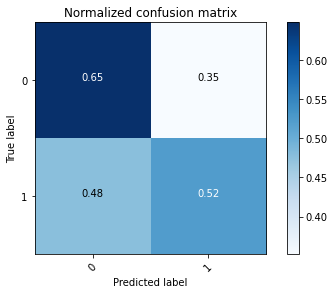

Accuracy:  0.6434886700128105 
F1-score:  0.09697324325762009
Logistic regression, binning on "['xreg_03']" with equal width, i=5


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


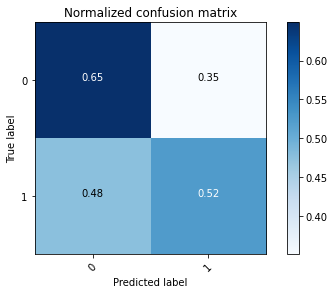

Accuracy:  0.6444967133586744 
F1-score:  0.09746214544679037
Logistic regression, binning on "['xreg_03']" with equal width, i=6


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


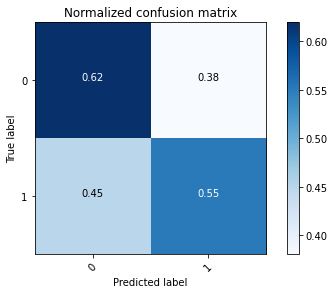

Accuracy:  0.6171955394081946 
F1-score:  0.09542950722048532
Logistic regression, binning on "['xreg_03']" with equal width, i=7


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


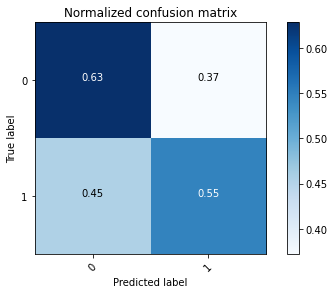

Accuracy:  0.6251023794023143 
F1-score:  0.09642396173411283
Logistic regression, binning on "['xreg_03']" with equal width, i=8


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


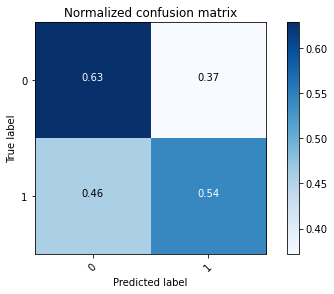

Accuracy:  0.6252808870781443 
F1-score:  0.09605349815086885
Logistic regression, binning on "['xreg_03']" with equal width, i=9


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


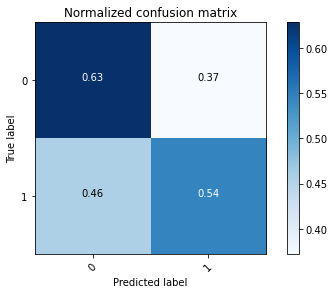

Accuracy:  0.6251233803053531 
F1-score:  0.0963373579365682
Logistic regression, binning on "['xreg_03']" with equal width, i=10


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


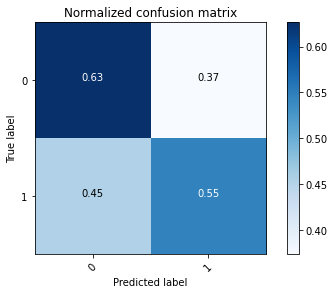

Accuracy:  0.6235063107713632 
F1-score:  0.09619117239293186
Logistic regression, binning on "['xreg_03']" with equal width, i=11


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


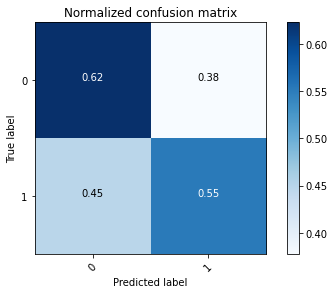

Accuracy:  0.6200936640275532 
F1-score:  0.0962681720537543
Logistic regression, binning on "['xreg_03']" with equal width, i=12


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


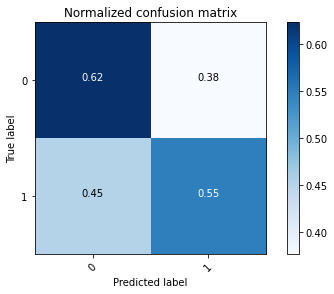

Accuracy:  0.6206396875065627 
F1-score:  0.09580538592451697
Logistic regression, binning on "['xreg_03']" with equal width, i=13


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


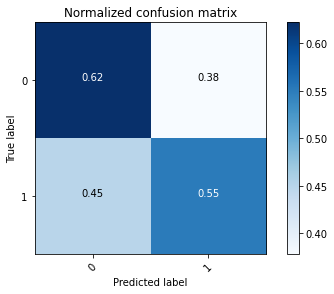

Accuracy:  0.6195476405485436 
F1-score:  0.0959628723988223
Logistic regression, binning on "['xreg_03']" with equal width, i=14


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


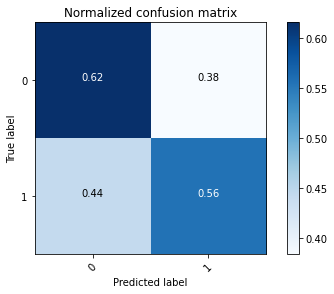

Accuracy:  0.6136883886007098 
F1-score:  0.09553545088012588


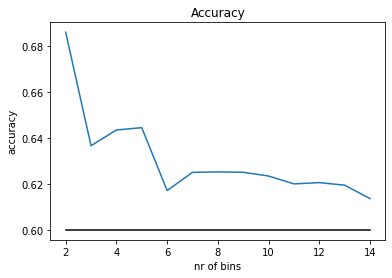

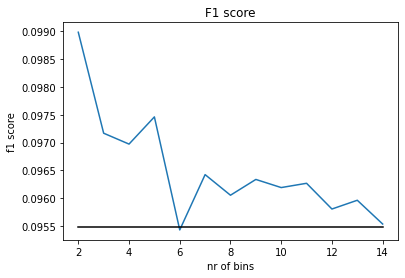

(0.6859209946027679, 0.09898484802843631, 2)


In [40]:
acc_list, f1_list = try_binning_eqH(['xreg_03'], range(2, 15))
best = max(zip(acc_list, f1_list, range(2, 15)), key=lambda x: x[1])
print(best)

if (best[1] > f1_prev):
    X_train, X_val, X_test = bin_columns_height(['xreg_03'], best[2])
    acc_prev = best[0]
    f1_prev = best[1]

Logistic regression, binning on "['xcar_13']" with equal width, i=2


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


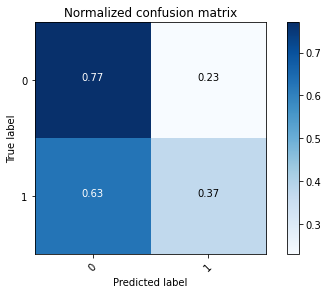

Accuracy:  0.7556439926916857 
F1-score:  0.10056815985776678
Logistic regression, binning on "['xcar_13']" with equal width, i=3


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


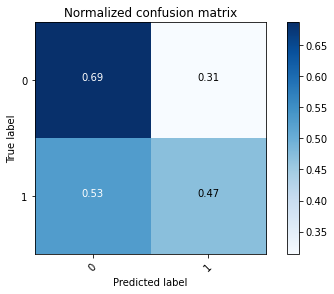

Accuracy:  0.6784761744755025 
F1-score:  0.09723450675157734
Logistic regression, binning on "['xcar_13']" with equal width, i=4


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


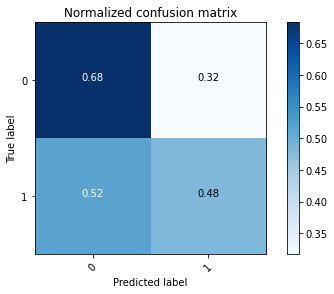

Accuracy:  0.6755780498561438 
F1-score:  0.09819030939871572
Logistic regression, binning on "['xcar_13']" with equal width, i=5


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


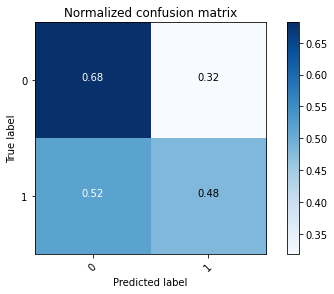

Accuracy:  0.6746750110254741 
F1-score:  0.0981020027945971
Logistic regression, binning on "['xcar_13']" with equal width, i=6


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


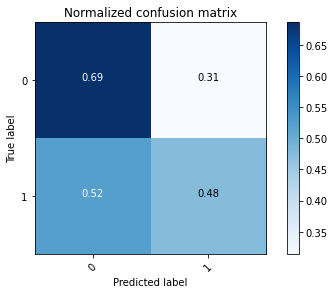

Accuracy:  0.6784551735724637 
F1-score:  0.09802650957290134
Logistic regression, binning on "['xcar_13']" with equal width, i=7


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


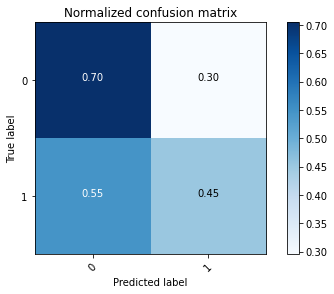

Accuracy:  0.6953924018732806 
F1-score:  0.09823121638844849
Logistic regression, binning on "['xcar_13']" with equal width, i=8


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


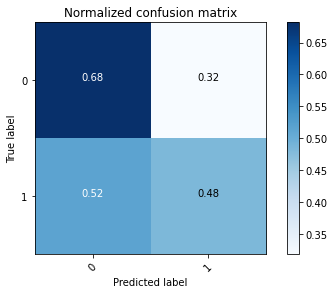

Accuracy:  0.6743389965768528 
F1-score:  0.09816807211398663
Logistic regression, binning on "['xcar_13']" with equal width, i=9


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


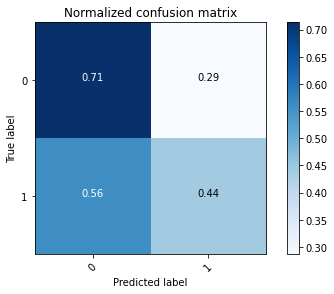

Accuracy:  0.7034462481886721 
F1-score:  0.09833343975480492
Logistic regression, binning on "['xcar_13']" with equal width, i=10


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


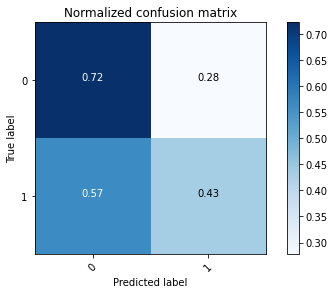

Accuracy:  0.7118676103072432 
F1-score:  0.09956028089518934
Logistic regression, binning on "['xcar_13']" with equal width, i=11


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


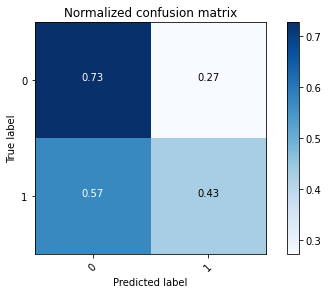

Accuracy:  0.7166768171031355 
F1-score:  0.09963961558996262
Logistic regression, binning on "['xcar_13']" with equal width, i=12


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


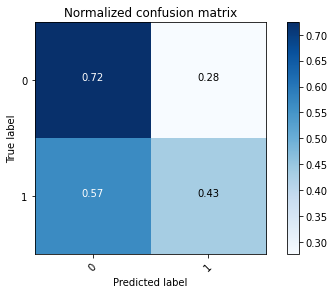

Accuracy:  0.713253669907806 
F1-score:  0.09975604931759742
Logistic regression, binning on "['xcar_13']" with equal width, i=13


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


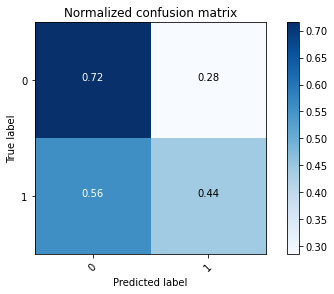

Accuracy:  0.7053678308167252 
F1-score:  0.09896920458559455
Logistic regression, binning on "['xcar_13']" with equal width, i=14


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


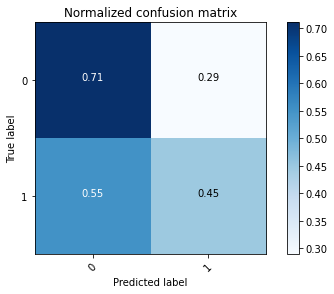

Accuracy:  0.7012306529180755 
F1-score:  0.09898983501694164


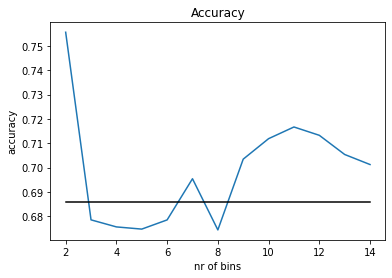

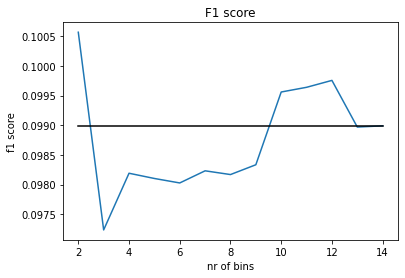

(0.7556439926916857, 0.10056815985776678, 2)


In [41]:
acc_list, f1_list = try_binning_eqH(['xcar_13'], range(2, 15))
best = max(zip(acc_list, f1_list, range(2, 15)), key=lambda x: x[1])
print(best)

if (best[1] > f1_prev):
    X_train, X_val, X_test = bin_columns_height(['xcar_13'], best[2])
    acc_prev = best[0]
    f1_prev = best[1]

Logistic regression, binning on "['xcar_14']" with equal width, i=2


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


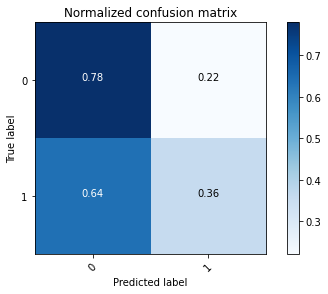

Accuracy:  0.7642438624860869 
F1-score:  0.10040868659347704
Logistic regression, binning on "['xcar_14']" with equal width, i=3


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


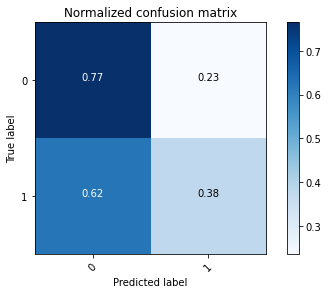

Accuracy:  0.7509502908625071 
F1-score:  0.10002276694239964
Logistic regression, binning on "['xcar_14']" with equal width, i=4


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


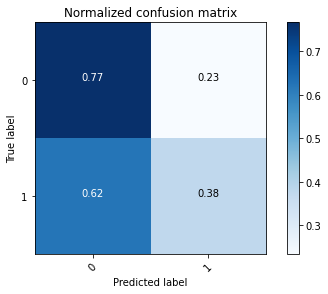

Accuracy:  0.7524308545267446 
F1-score:  0.10042351863863559
Logistic regression, binning on "['xcar_14']" with equal width, i=5


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


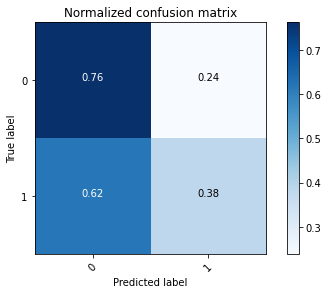

Accuracy:  0.7481466703068232 
F1-score:  0.10023633567168098
Logistic regression, binning on "['xcar_14']" with equal width, i=6


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


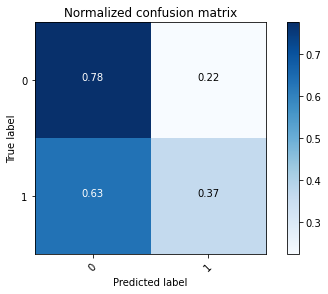

Accuracy:  0.7609047189029128 
F1-score:  0.10078192875760207
Logistic regression, binning on "['xcar_14']" with equal width, i=7


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


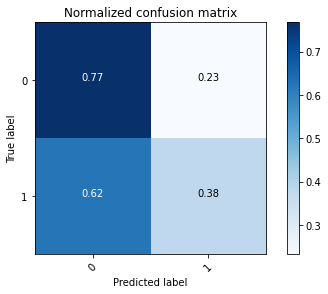

Accuracy:  0.7529033748451184 
F1-score:  0.10018354236769654
Logistic regression, binning on "['xcar_14']" with equal width, i=8


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


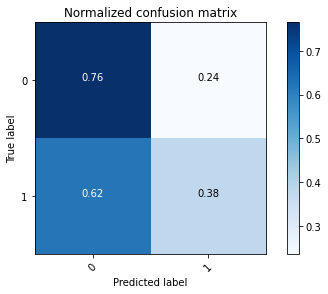

Accuracy:  0.7505617741562888 
F1-score:  0.09954133656798453
Logistic regression, binning on "['xcar_14']" with equal width, i=9


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


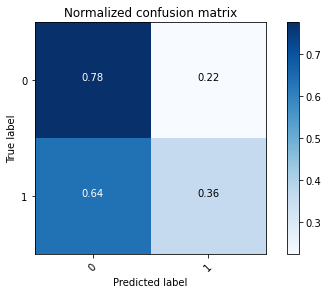

Accuracy:  0.7605477035512527 
F1-score:  0.10029195928351614
Logistic regression, binning on "['xcar_14']" with equal width, i=10


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


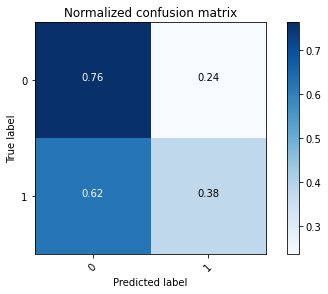

Accuracy:  0.7497427389377743 
F1-score:  0.09999622370756392
Logistic regression, binning on "['xcar_14']" with equal width, i=11


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


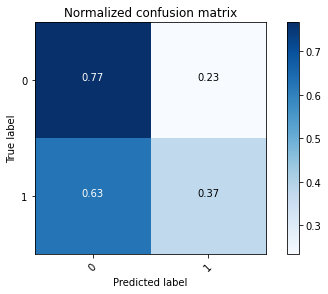

Accuracy:  0.7518008274355797 
F1-score:  0.09950855270676978
Logistic regression, binning on "['xcar_14']" with equal width, i=12


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


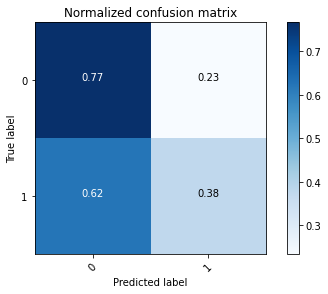

Accuracy:  0.7521263414326816 
F1-score:  0.09990086174025777
Logistic regression, binning on "['xcar_14']" with equal width, i=13


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


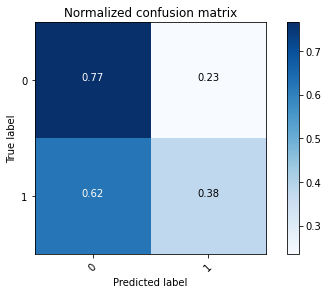

Accuracy:  0.7513808093748031 
F1-score:  0.09983652054898681
Logistic regression, binning on "['xcar_14']" with equal width, i=14


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


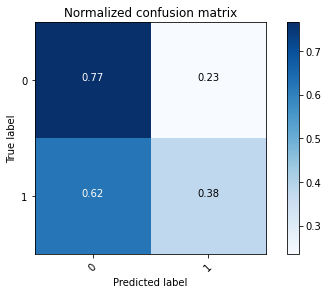

Accuracy:  0.7514858138899972 
F1-score:  0.09994295493439817


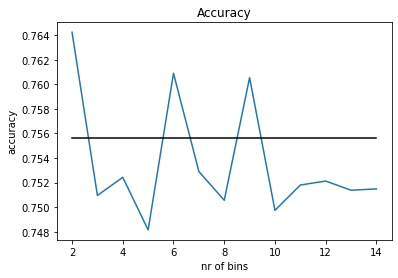

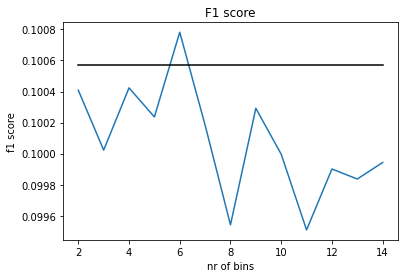

(0.7609047189029128, 0.10078192875760207, 6)


In [42]:
acc_list, f1_list = try_binning_eqH(['xcar_14'], range(2, 15))
best = max(zip(acc_list, f1_list, range(2, 15)), key=lambda x: x[1])
print(best)

if (best[1] > f1_prev):
    X_train, X_val, X_test = bin_columns_height(['xcar_14'], best[2])
    acc_prev = best[0]
    f1_prev = best[1]

Logistic regression, binning on "['xcar_15']" with equal width, i=2


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


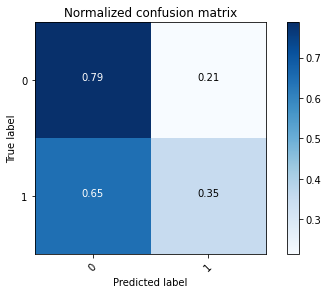

Accuracy:  0.7710796564252262 
F1-score:  0.10191555097837281
Logistic regression, binning on "['xcar_15']" with equal width, i=3


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


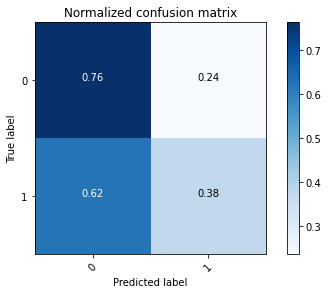

Accuracy:  0.7496272339710608 
F1-score:  0.09927470534904805
Logistic regression, binning on "['xcar_15']" with equal width, i=4


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


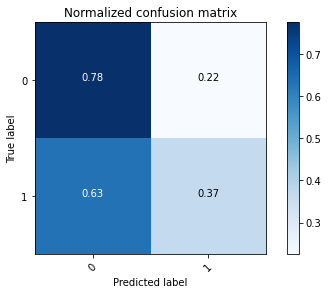

Accuracy:  0.7602221895541508 
F1-score:  0.1008072455207718
Logistic regression, binning on "['xcar_15']" with equal width, i=5


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


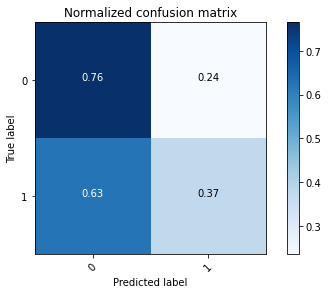

Accuracy:  0.7506037759623664 
F1-score:  0.09928324926997611
Logistic regression, binning on "['xcar_15']" with equal width, i=6


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


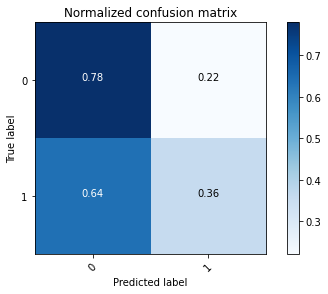

Accuracy:  0.7639288489405044 
F1-score:  0.10043213828425097
Logistic regression, binning on "['xcar_15']" with equal width, i=7


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


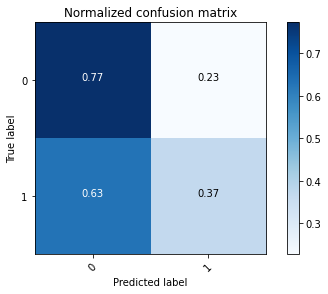

Accuracy:  0.7575655753197388 
F1-score:  0.10037406483790523
Logistic regression, binning on "['xcar_15']" with equal width, i=8


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


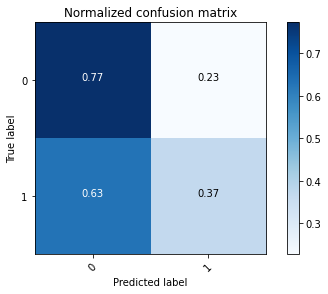

Accuracy:  0.7575655753197388 
F1-score:  0.10037406483790523
Logistic regression, binning on "['xcar_15']" with equal width, i=9


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


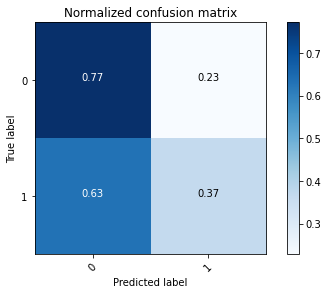

Accuracy:  0.7567150387466661 
F1-score:  0.09949862023397724
Logistic regression, binning on "['xcar_15']" with equal width, i=10


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


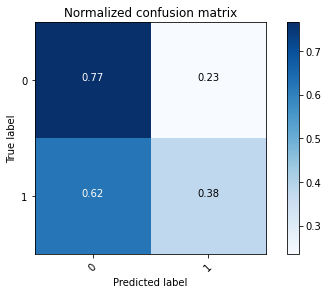

Accuracy:  0.7514228111808807 
F1-score:  0.09985170538803757
Logistic regression, binning on "['xcar_15']" with equal width, i=11


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


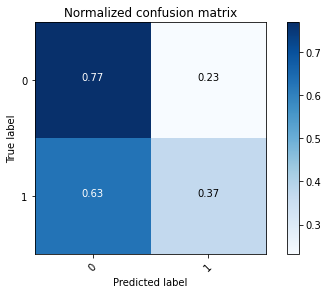

Accuracy:  0.7542369321880841 
F1-score:  0.09963454510482786
Logistic regression, binning on "['xcar_15']" with equal width, i=12


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


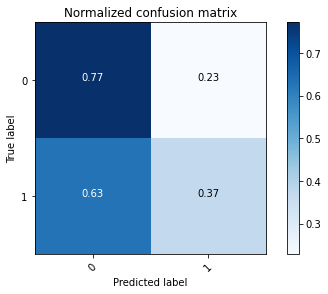

Accuracy:  0.7568725455194574 
F1-score:  0.10025647003963628
Logistic regression, binning on "['xcar_15']" with equal width, i=13


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


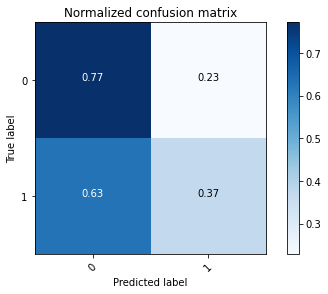

Accuracy:  0.7568725455194574 
F1-score:  0.10025647003963628
Logistic regression, binning on "['xcar_15']" with equal width, i=14


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


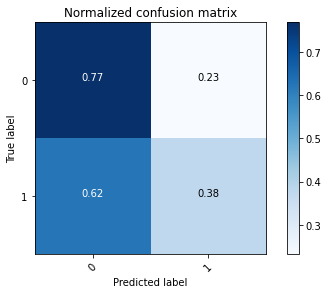

Accuracy:  0.7537434109666715 
F1-score:  0.10069790628115653


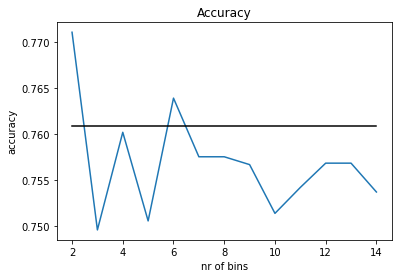

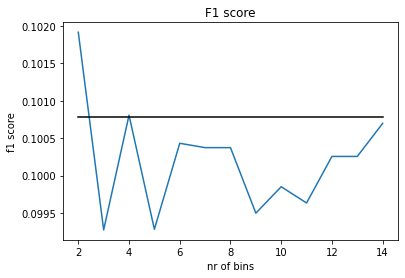

(0.7710796564252262, 0.10191555097837281, 2)


In [43]:
acc_list, f1_list = try_binning_eqH(['xcar_15'], range(2, 15))
best = max(zip(acc_list, f1_list, range(2, 15)), key=lambda x: x[1])
print(best)

if (best[1] > f1_prev):
    X_train, X_val, X_test = bin_columns_height(['xcar_15'], best[2])
    acc_prev = best[0]
    f1_prev = best[1]

In [44]:
X_train.to_csv('X_train_after_binning.csv')
X_val.to_csv('X_val_after_binning.csv')
X_test.to_csv('X_test_after_binning.csv')
y_train.to_csv('y_train_after_binning.csv')
y_val.to_csv('y_val_after_binning.csv')
y_test.to_csv('y_test_after_binning.csv')

In [45]:
#X_train = pd.read_csv('X_train_after_binning.csv')
#X_val = pd.read_csv('X_val_after_binning.csv')
#X_test = pd.read_csv('X_test_after_binning.csv')
#y_train = pd.read_csv('y_train_after_binning.csv')
#y_val = pd.read_csv('y_val_after_binning.csv')
#y_test = pd.read_csv('y_test_after_binning.csv')

### Low variance?
Now I'll have a look on columns that have low variance.

In [46]:
X_train.var() < 0.01

xind_01         False
xind_02_cat     False
xind_03         False
xind_04_cat     False
xind_05_cat     False
xind_06_bin     False
xind_07_bin     False
xind_08_bin     False
xind_09_bin     False
xind_10_bin      True
xind_11_bin      True
xind_13_bin      True
xind_14         False
xind_15         False
xind_16_bin     False
xind_17_bin     False
xind_18_bin     False
xreg_02         False
xreg_03         False
xcar_01_cat     False
xcar_02_cat     False
xcar_03_cat     False
xcar_04_cat     False
xcar_05_cat     False
xcar_06_cat     False
xcar_07_cat     False
xcar_08_cat     False
xcar_09_cat     False
xcar_10_cat      True
xcar_11_cat     False
xcar_11         False
xcar_13         False
xcar_14         False
xcar_15         False
xcalc_01        False
xcalc_02        False
xcalc_03        False
xcalc_04        False
xcalc_05        False
xcalc_06        False
xcalc_07        False
xcalc_08        False
xcalc_09        False
xcalc_10        False
xcalc_11        False
xcalc_12  

In [47]:
X_train_var = X_train[X_train.columns[X_train.var() >= 0.01]]
X_val_var = X_val[X_train.columns[X_train.var() >= 0.01]]

/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


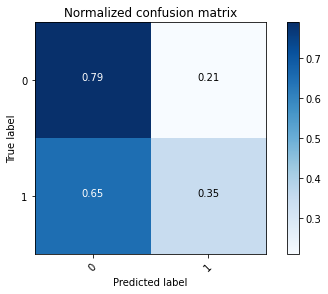

Accuracy:  0.7734212571140558 
F1-score:  0.10181485181485184
Previous accuracy:  0.7710796564252262 
previous F1-score:  0.10191555097837281
Accuracy diff: 0.0023416006888296037, F1-score diff: -0.0001006991635209703


In [48]:
acc, f1 = log_regression(X_train_var, X_val_var, y_train, y_val)
print('Accuracy: ', acc,'\nF1-score: ', f1)
print('Previous accuracy: ', acc_prev,'\nprevious F1-score: ', f1_prev)
print(f'Accuracy diff: {acc - acc_prev}, F1-score diff: {f1 - f1_prev}')

As there is only tiny difference in accuracy and F1-score, I will apply the change. Anything that reduces dimension "for free" is good.

In [49]:
X_train = X_train_var
X_val = X_val_var
X_test = X_test[X_train.columns[X_train.var() >= 0.01]]

In [50]:
acc_prev = acc
f1_prev = f1

### Any duplicates?

In [51]:
X_train[X_train.duplicated()]

,xind_01,xind_02_cat,xind_03,xind_04_cat,xind_05_cat,xind_06_bin,xind_07_bin,xind_08_bin,xind_09_bin,xind_14,xind_15,xind_16_bin,xind_17_bin,xind_18_bin,xreg_02,xreg_03,xcar_01_cat,xcar_02_cat,xcar_03_cat,xcar_04_cat,xcar_05_cat,xcar_06_cat,xcar_07_cat,xcar_08_cat,xcar_09_cat,xcar_11_cat,xcar_11,xcar_13,xcar_14,xcar_15,xcalc_01,xcalc_02,xcalc_03,xcalc_04,xcalc_05,xcalc_06,xcalc_07,xcalc_08,xcalc_09,xcalc_10,xcalc_11,xcalc_12,xcalc_13,xcalc_14,xcalc_15_bin,xcalc_16_bin,xcalc_17_bin,xcalc_18_bin,xcalc_19_bin,xcalc_20_bin


## Run on test data (cleaned & binned)

/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


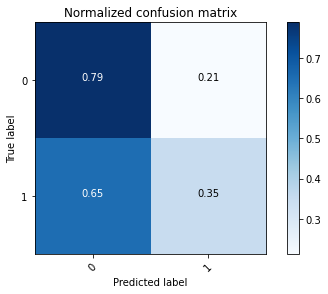

Accuracy:  0.7717715447359358 
F1-score:  0.09979788608727345


In [52]:
acc, f1 = log_regression(X_train, X_test, y_train, y_test)
print('Accuracy: ', acc,'\nF1-score: ', f1)

Accuracy is quite the same as in validation data, but F1 score dropped a bit.

# Balancing the dataset

In [53]:
perc = y_train['y'].sum() / len(y_train['y'])
perc

0.03639728562615669

I can try to delete some data from the majority class which has missing data (represented by -1)

In [54]:
X_train_maj = X_train[y_train['y'] == 0]

In [55]:
percent_of_missing = (X_train_maj == -1).sum(axis=1) / len(X_train_maj.columns)

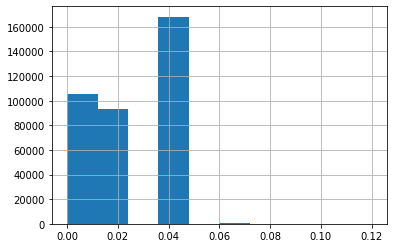

In [56]:
percent_of_missing.hist()

In [57]:
len(X_train_maj[percent_of_missing > 0.04]) / len(X_train_maj)

0.0008200070831176615

In [58]:
(1 - len(X_train_maj[percent_of_missing > 0.04]) / len(X_train_maj)) * len(X_train)

380622.63060179254

In [59]:
X_train_cl = X_train[(y_train['y'] == 1) | (((X_train == -1).sum(axis=1) / len(X_train.columns)) < 0.04)]

In [60]:
y_train_cl = y_train[(y_train['y'] == 1) | (((X_train == -1).sum(axis=1) / len(X_train.columns)) < 0.04)]

In [61]:
perc = y_train_cl['y'].sum() / len(y_train_cl['y'])
perc

0.06526978806737405

In [62]:
major_class = len(y_train_cl['y']) - y_train_cl['y'].sum()
major_class

198561

/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


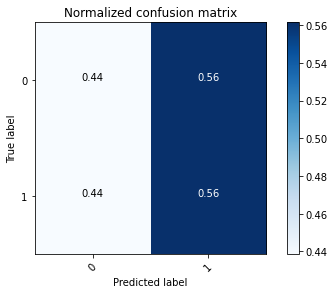

Accuracy:  0.44305605141021065 
F1-score:  0.06882022471910113
Previous accuracy:  0.7734212571140558 
previous F1-score:  0.10181485181485184
Accuracy diff: -0.3303652057038452, F1-score diff: -0.03299462709575071


In [63]:
acc, f1 = log_regression(X_train_cl, X_val, y_train_cl, y_val)
print('Accuracy: ', acc,'\nF1-score: ', f1)
print('Previous accuracy: ', acc_prev,'\nprevious F1-score: ', f1_prev)
print(f'Accuracy diff: {acc - acc_prev}, F1-score diff: {f1 - f1_prev}')

### I will not apply the change above.

## Some undersampling experiments
### Random
Delete some of majority class randomly

In [64]:
majority_count = len(y_train['y']) - y_train['y'].sum()
minority_count = y_train['y'].sum()
print(majority_count)
print(minority_count)

367070
13865


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


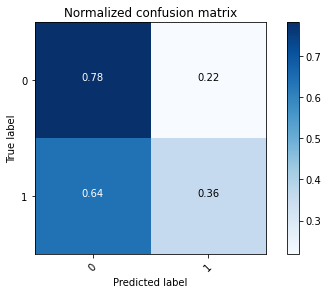

majority class: 348716 (0.95 %), minority class: 13865
Accuracy:  0.7661864460171788 
F1-score:  0.10159370587048618


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


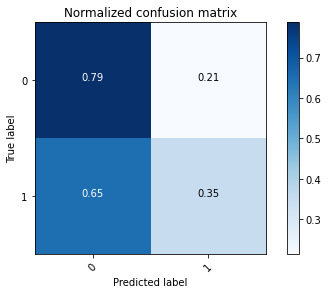

majority class: 330363 (0.9 %), minority class: 13865
Accuracy:  0.7709536510069933 
F1-score:  0.10082855847314398


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


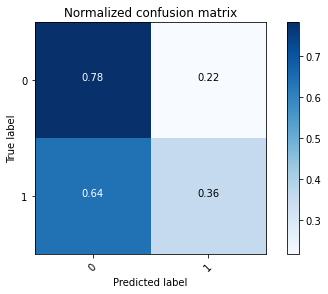

majority class: 293656 (0.8 %), minority class: 13865
Accuracy:  0.766774471302266 
F1-score:  0.10153310950204279


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


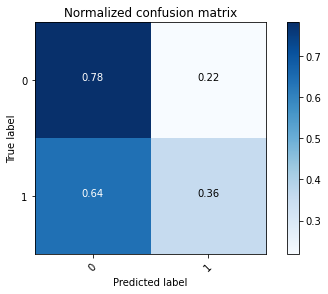

majority class: 256948 (0.7 %), minority class: 13865
Accuracy:  0.7659449356322322 
F1-score:  0.10062943834732085


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


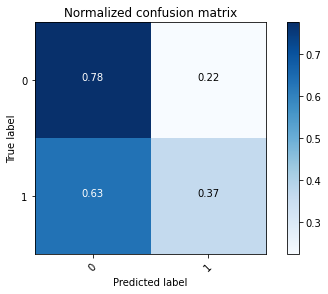

majority class: 220242 (0.6 %), minority class: 13865
Accuracy:  0.7607262112270827 
F1-score:  0.10092720457683962


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


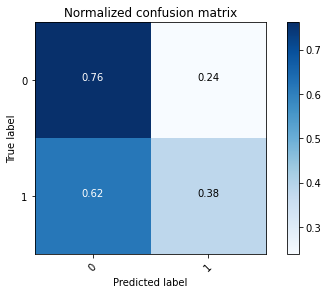

majority class: 183535 (0.5 %), minority class: 13865
Accuracy:  0.7472856332822312 
F1-score:  0.09992894274281013


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


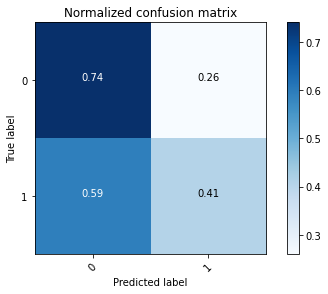

majority class: 146828 (0.4 %), minority class: 13865
Accuracy:  0.72826931558057 
F1-score:  0.09895543175487465


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


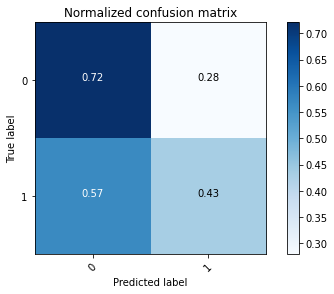

majority class: 110121 (0.3 %), minority class: 13865
Accuracy:  0.7103870466430057 
F1-score:  0.09845389468178996


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


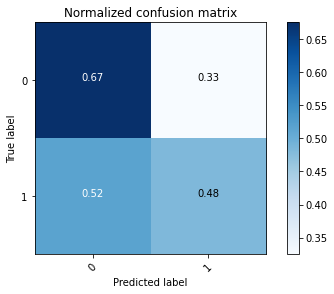

majority class: 73414 (0.2 %), minority class: 13865
Accuracy:  0.6679547220530483 
F1-score:  0.0964110184021031


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


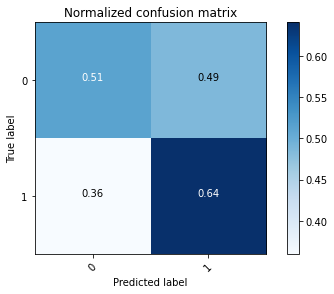

majority class: 36707 (0.1 %), minority class: 13865
Accuracy:  0.5187118046075981 
F1-score:  0.08889418967539309


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


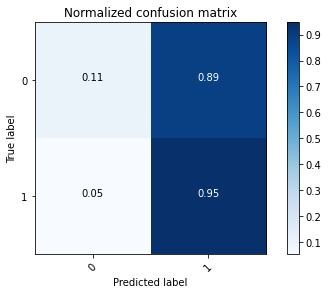

majority class: 13865 (0.03777208706786172 %), minority class: 13865
Accuracy:  0.142008106348573 
F1-score:  0.07490433168036592


In [65]:
r = [0.95, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, minority_count/majority_count]
acc_list = []
f1_list = []
for i in r:
    rus = RandomUnderSampler(random_state=RANDOM_STATE, sampling_strategy={0: math.floor(majority_count * i), 1: minority_count})
    X_train_r, y_train_r = rus.fit_resample(X_train, y_train)
    acc, f1 = log_regression(X_train_r, X_val, y_train_r, y_val)
    print(f'majority class: {math.floor(majority_count * i)} ({i} %), minority class: {minority_count}')
    print('Accuracy: ', acc,'\nF1-score: ', f1)
    acc_list.append(acc)
    f1_list.append(f1)

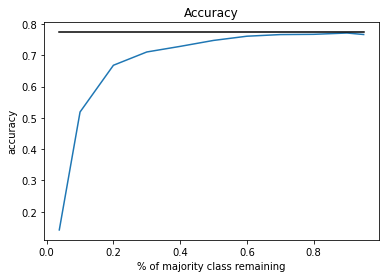

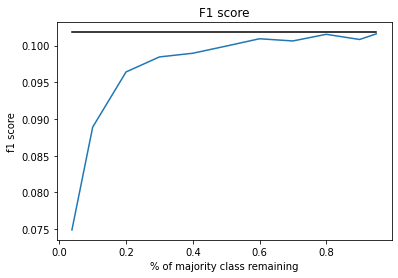

In [66]:
plot_stats(r, acc_list, f1_list, '% of majority class remaining', acc_prev, f1_prev)

I need to remove some data from majority class. Starting with RandomUnderSampler, I will reduce the majority data to 80%.

/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


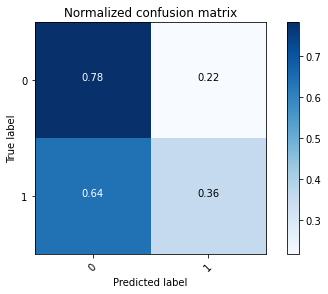

majority class: 293656 (80 %), minority class: 13865
Accuracy:  0.766774471302266 
F1-score:  0.10153310950204279


In [67]:
rus = RandomUnderSampler(random_state=RANDOM_STATE, sampling_strategy={0: math.floor(majority_count * 0.8), 1: minority_count})
X_train, y_train = rus.fit_resample(X_train, y_train)
acc, f1 = log_regression(X_train, X_val, y_train, y_val)
print(f'majority class: {math.floor(majority_count * 0.8)} (80 %), minority class: {minority_count}')
print('Accuracy: ', acc,'\nF1-score: ', f1)
acc_prev = acc
f1_prev = f1

## Run on test data (balanced by random undersampling)

/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


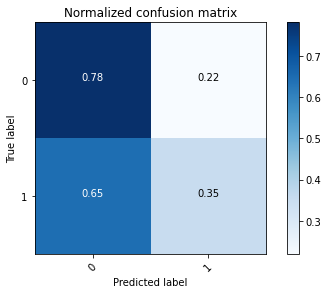

Accuracy:  0.7652276908344043 
F1-score:  0.09920711661187391


In [68]:
acc, f1 = log_regression(X_train, X_test, y_train, y_test)
print('Accuracy: ', acc,'\nF1-score: ', f1)

### Some advanced undersampling methods will be needed
When deleting the data from majority class randomly, the true positive increases, but the model looses the ability to predict true negatives. The Accuracy and f1 score falls.

In [69]:
majority_count = len(y_train['y']) - y_train['y'].sum()
minority_count = y_train['y'].sum()
print(majority_count)
print(minority_count)

293656
13865


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


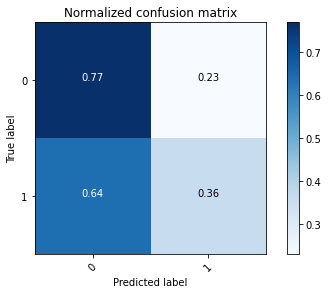

majority class: 278973 (95.0 %), minority class: 13865
Accuracy:  0.75413192767289 
F1-score:  0.09681774349083896


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


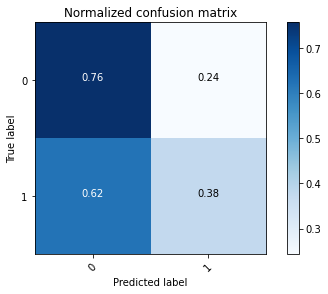

majority class: 264290 (90.0 %), minority class: 13865
Accuracy:  0.7428964445471156 
F1-score:  0.09706088431611168


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


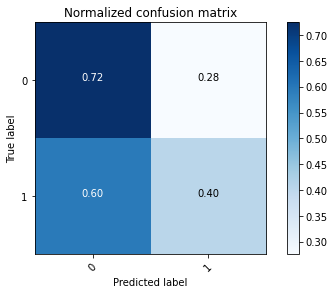

majority class: 234924 (80.0 %), minority class: 13865
Accuracy:  0.7128336518470294 
F1-score:  0.09353662578720583


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


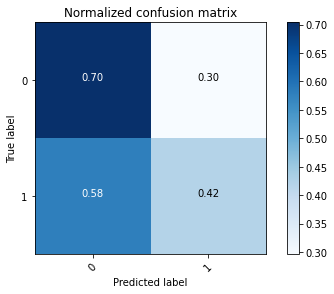

majority class: 205559 (70.0 %), minority class: 13865
Accuracy:  0.6935863242119411 
F1-score:  0.09147233724586692


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


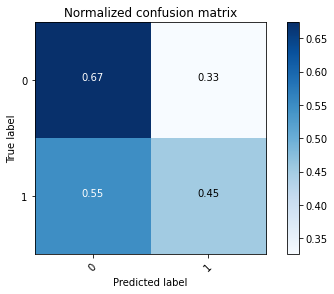

majority class: 176193 (60.0 %), minority class: 13865
Accuracy:  0.6656761240733352 
F1-score:  0.09013231217672106


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


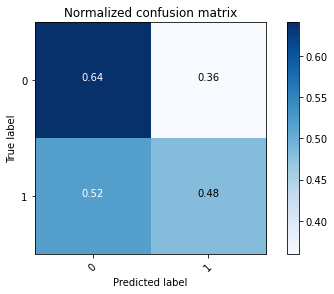

majority class: 146828 (50.0 %), minority class: 13865
Accuracy:  0.6347837957032152 
F1-score:  0.08814199197755812


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


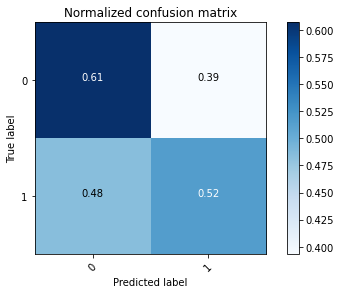

majority class: 117462 (40.0 %), minority class: 13865
Accuracy:  0.6034924501753576 
F1-score:  0.08703851454268513


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


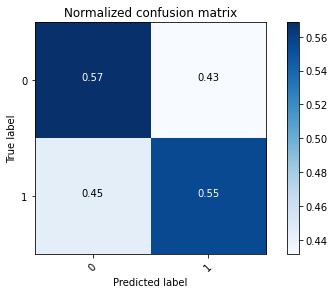

majority class: 88096 (30.0 %), minority class: 13865
Accuracy:  0.5680639267488502 
F1-score:  0.08611228366399325


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


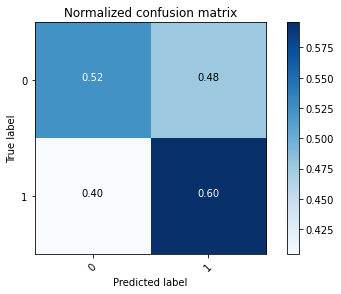

majority class: 58731 (20.0 %), minority class: 13865
Accuracy:  0.5259886175105529 
F1-score:  0.08437791570321691


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


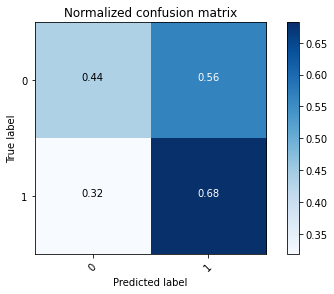

majority class: 29365 (10.0 %), minority class: 13865
Accuracy:  0.4445156141714094 
F1-score:  0.08261510448278851


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


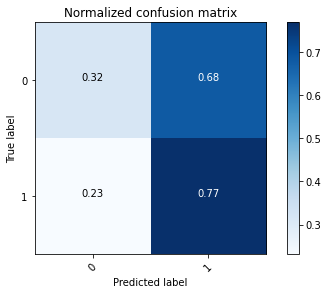

majority class: 13865 (4.721510883482714 %), minority class: 13865
Accuracy:  0.33469139172984436 
F1-score:  0.07813182016586644


In [70]:
r = [0.95, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, minority_count/majority_count]
acc_list = []
f1_list = []
for i in r:
    nm = NearMiss(sampling_strategy={0: math.floor(majority_count * i), 1: minority_count})
    X_train_r, y_train_r = nm.fit_resample(X_train, y_train)
    acc, f1 = log_regression(X_train_r, X_val, y_train_r, y_val)
    print(f'majority class: {math.floor(majority_count * i)} ({i*100} %), minority class: {minority_count}')
    print('Accuracy: ', acc,'\nF1-score: ', f1)
    acc_list.append(acc)
    f1_list.append(f1)

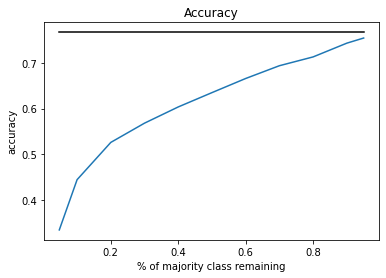

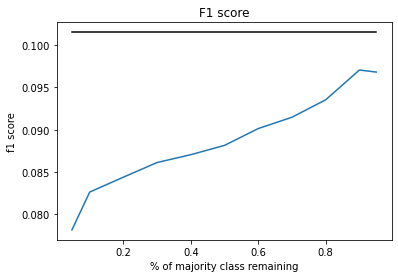

In [71]:
plot_stats(r, acc_list, f1_list, '% of majority class remaining', acc_prev, f1_prev)

As can be seen on the plots above, NearMiss algorithm didn't get it any better.

### And oversampling?
Now I need to increase the numbers of minority class

In [72]:
majority_count = len(y_train['y']) - y_train['y'].sum()
minority_count = y_train['y'].sum()
print(majority_count)
print(minority_count)

293656
13865


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


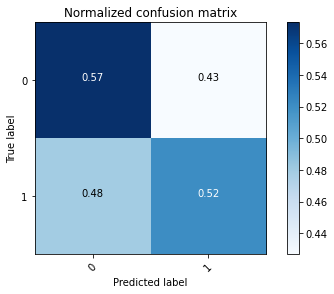

majority class: 293656, minority class: 27730
Accuracy:  0.5712350631077137 
F1-score:  0.08180612084279643


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


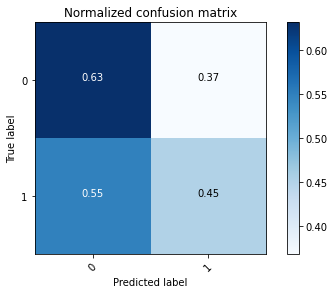

majority class: 293656, minority class: 41595
Accuracy:  0.624944872629523 
F1-score:  0.08109081553897608


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


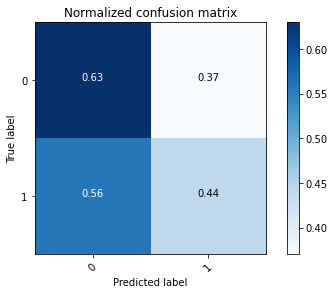

majority class: 293656, minority class: 55460
Accuracy:  0.6227712791650041 
F1-score:  0.07896423535444173


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


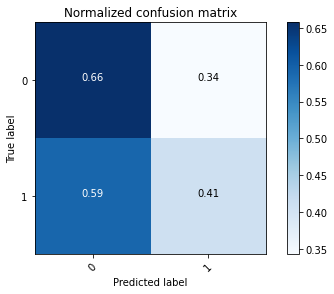

majority class: 293656, minority class: 69325
Accuracy:  0.648329378163261 
F1-score:  0.07842381882721994


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


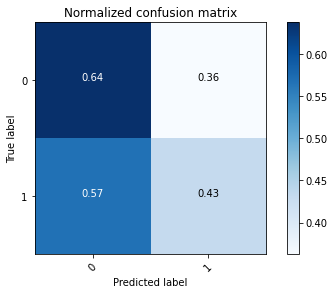

majority class: 293656, minority class: 83190
Accuracy:  0.6299325871012453 
F1-score:  0.07887927654792086


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


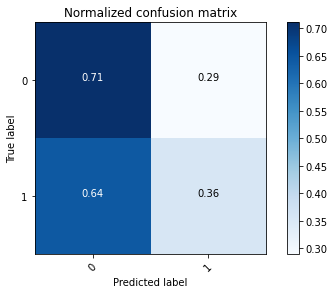

majority class: 293656, minority class: 97055
Accuracy:  0.6980070143016149 
F1-score:  0.079621095750128


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


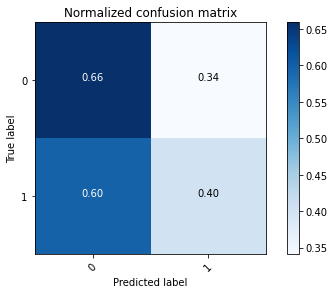

majority class: 293656, minority class: 110920
Accuracy:  0.6497154377638239 
F1-score:  0.0777418373835393


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


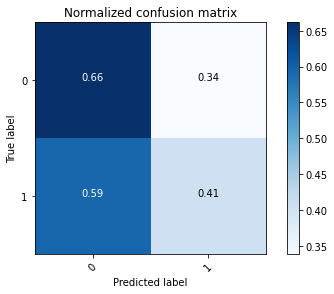

majority class: 293656, minority class: 124785
Accuracy:  0.6522250456769642 
F1-score:  0.07877169559412552


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


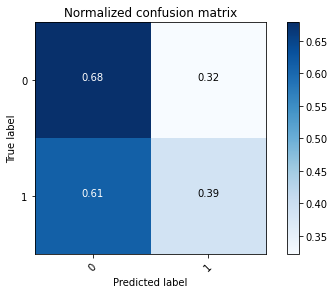

majority class: 293656, minority class: 138650
Accuracy:  0.6675347039922717 
F1-score:  0.07873603351955306


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


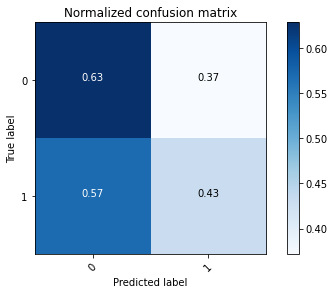

majority class: 293656, minority class: 207975
Accuracy:  0.6211437091794947 
F1-score:  0.07686009620304984


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


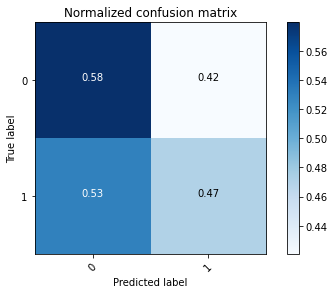

majority class: 293656, minority class: 277300
Accuracy:  0.575540248230674 
F1-score:  0.07522134016609092


In [73]:
r = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
acc_list = []
f1_list = []
for i in r:
    sm = SMOTE(random_state=RANDOM_STATE, sampling_strategy={0: majority_count, 1: minority_count * i})
    X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
    acc, f1 = log_regression(X_train_resampled, X_val, y_train_resampled, y_val)
    print(f'majority class: {math.floor(majority_count)}, minority class: {minority_count * i}')
    print('Accuracy: ', acc,'\nF1-score: ', f1)
    acc_list.append(acc)
    f1_list.append(f1)

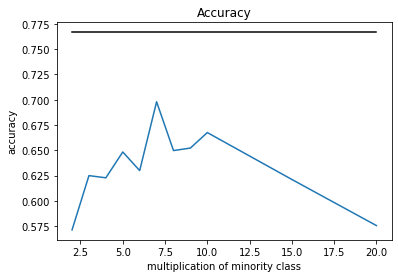

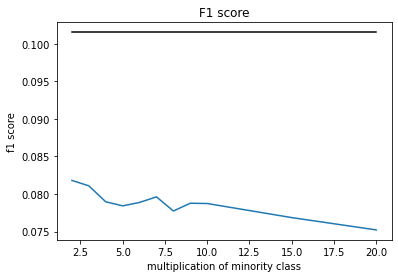

In [74]:
plot_stats(r, acc_list, f1_list, 'multiplication of minority class', acc_prev, f1_prev)

Smote oversampling didn't help at all. I'll try another algorithm - ADASYN.

/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


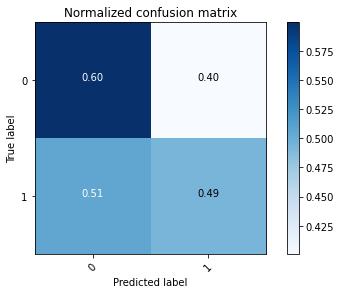

majority class: 293656, minority class: 27730
Accuracy:  0.5954701052145243 
F1-score:  0.0820605685148562


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


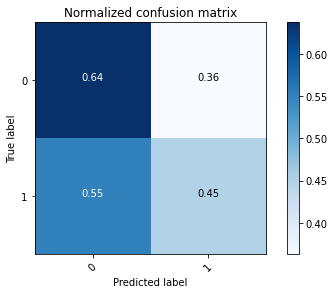

majority class: 293656, minority class: 41595
Accuracy:  0.6303841065165802 
F1-score:  0.08180300500834724


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


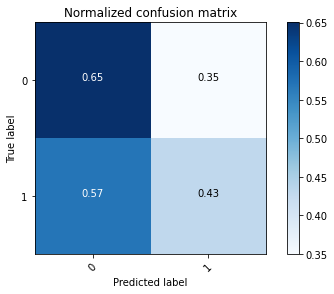

majority class: 293656, minority class: 55460
Accuracy:  0.6422181153789613 
F1-score:  0.08111971090315795


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


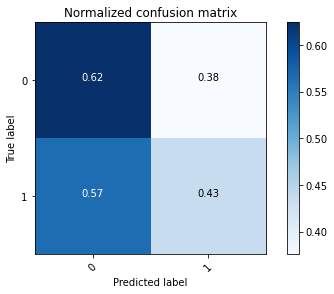

majority class: 293656, minority class: 69325
Accuracy:  0.6172270407627528 
F1-score:  0.07683541418694761


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


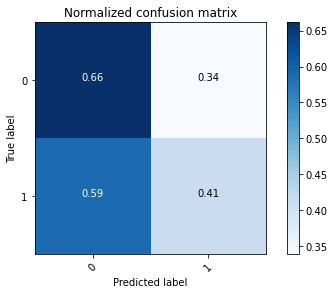

majority class: 293656, minority class: 83190
Accuracy:  0.6523405506436777 
F1-score:  0.08007557444916785


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


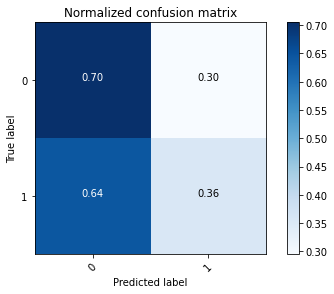

majority class: 293656, minority class: 97055
Accuracy:  0.6921897641598589 
F1-score:  0.0784658912291732


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


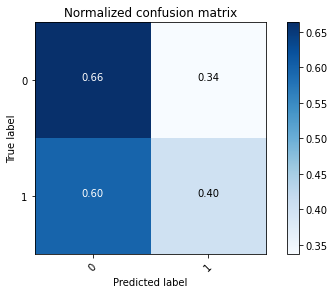

majority class: 293656, minority class: 110920
Accuracy:  0.6537371106957599 
F1-score:  0.07857382362803174


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


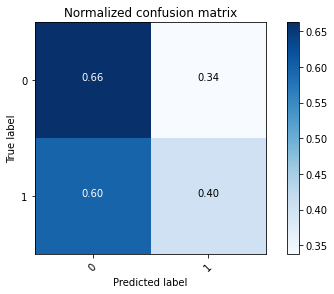

majority class: 293656, minority class: 124785
Accuracy:  0.652981078186362 
F1-score:  0.07857023364746557


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


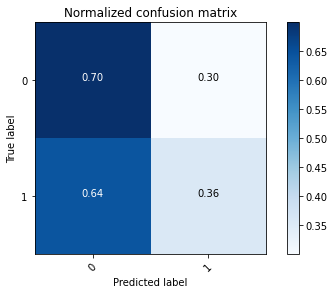

majority class: 293656, minority class: 138650
Accuracy:  0.6872335510426948 
F1-score:  0.07714710620894782


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


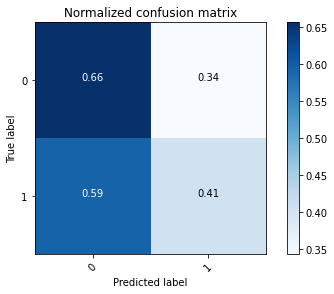

majority class: 293656, minority class: 207975
Accuracy:  0.6472898334628389 
F1-score:  0.07770455793520044


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


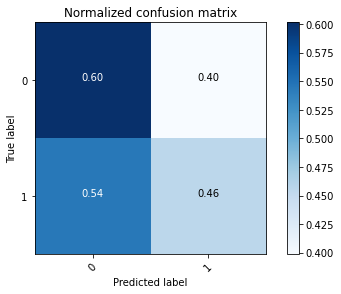

majority class: 293656, minority class: 277300
Accuracy:  0.5959846273389756 
F1-score:  0.07633954292298828


In [75]:
r = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
acc_list = []
f1_list = []
for i in r:
    sm = ADASYN(random_state=RANDOM_STATE, sampling_strategy={0: majority_count, 1: minority_count * i})
    X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
    acc, f1 = log_regression(X_train_resampled, X_val, y_train_resampled, y_val)
    print(f'majority class: {math.floor(majority_count)}, minority class: {minority_count * i}')
    print('Accuracy: ', acc,'\nF1-score: ', f1)
    acc_list.append(acc)
    f1_list.append(f1)

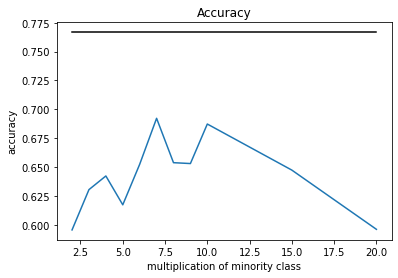

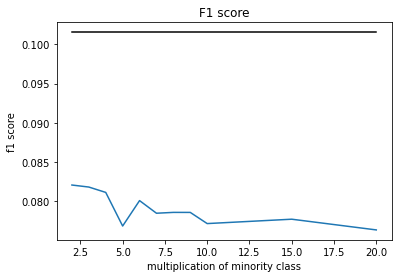

In [76]:
plot_stats(r, acc_list, f1_list, 'multiplication of minority class', acc_prev, f1_prev)

ADASYN didn't help either.

### As I should run prediction on test data twice on balanced dataset, I will apply the some oversampling and undersampling I found.

Nearmiss.

/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


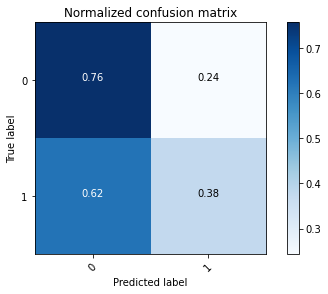

In [77]:
nm = NearMiss(sampling_strategy={0: math.floor(majority_count * 0.9), 1: minority_count})
X_train_r, y_train_r = nm.fit_resample(X_train, y_train)
acc, f1 = log_regression(X_train_r, X_val, y_train_r, y_val)

Adasyn.

In [78]:
majority_count = len(y_train_r['y']) - y_train_r['y'].sum()
minority_count = y_train_r['y'].sum()
print(majority_count)
print(minority_count)

264290
13865


/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


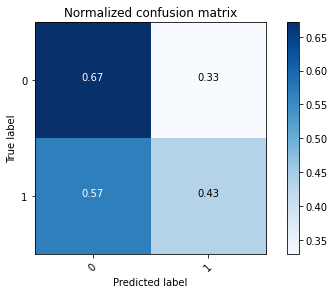

In [79]:
sm = ADASYN(random_state=RANDOM_STATE, sampling_strategy={0: majority_count, 1: minority_count * 2})
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_r, y_train_r)
acc, f1 = log_regression(X_train_resampled, X_val, y_train_resampled, y_val)

/home/dolanver/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


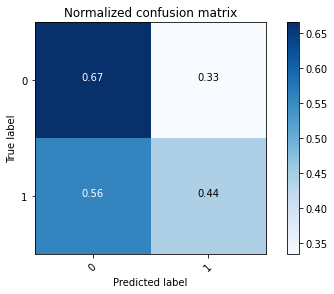

Accuracy:  0.6575943146594088 
F1-score:  0.08601475435567416


In [80]:
acc, f1 = log_regression(X_train_resampled, X_test, y_train_resampled, y_test)
print('Accuracy: ', acc,'\nF1-score: ', f1)

As expected, F1 score is only worse with these balancing techniques.